In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pysta
import stc
import stcl

import os

%load_ext autoreload
%autoreload 2

## load clustering results

In [3]:
def load_clustering(dataset_name, tap=8, dim=3):
    folder_name = "{}_tap{}_cov_classic_cluster_dim{}".format(dataset_name, tap, dim)
#     filename = os.path.join(folder_name, "clusters_combined.csv")
    filename = os.path.join(folder_name, "clusters.csv")    

    return pd.read_csv(filename)

cluster_dim = 2
# cluster_dim = 3

cluster1 = load_clustering("20180618", dim=cluster_dim)
cluster1["dataset"] = "20180618"
cluster2 = load_clustering("20180621", dim=cluster_dim)
cluster2["dataset"] = "20180621"
cluster3 = load_clustering("20180626", dim=cluster_dim)
cluster3["dataset"] = "20180626"
# cluster4 = load_clustering("20180828")
# cluster4["dataset"] = "20180828"


# combine all patches 
# cluster = pd.concat([cluster1, cluster2, cluster3, cluster4])
cluster = pd.concat([cluster1, cluster2, cluster3])

print("total = ", len(cluster))
print(cluster["cell_type"].value_counts())
print(cluster["cell_type"].value_counts() / len(cluster))

total =  389
OFF        169
unknown    129
ON          91
Name: cell_type, dtype: int64
OFF        0.434447
unknown    0.331620
ON         0.233933
Name: cell_type, dtype: float64


In [4]:
cluster.groupby("cell_type").mean()

num_spikes       PSNR      eig1      eig2      eig3  converged  \
cell_type                                                                    
OFF        4555.485207  16.585761  1.177086  1.092602  1.045497       True   
ON         3263.219780  16.092398  0.931845  0.868955  0.839521       True   
unknown    2894.542636   7.353616  2.256193  2.006904  1.901224       True   

               PSNR1      PSNR2   weight1   weight2  inner_product  
cell_type                                                           
OFF        12.405428  10.314392  0.561508  0.438492       0.119448  
ON         12.794743  10.525676  0.544275  0.455725       0.064662  
unknown     6.393611   6.232177  0.508012  0.491988      -0.164181

In [5]:
cluster.groupby("cell_type").median()

num_spikes       PSNR      eig1      eig2      eig3  converged  \
cell_type                                                                   
OFF              2035  16.783862  0.744122  0.705149  0.690602       True   
ON               2190  16.491749  0.790669  0.728066  0.708054       True   
unknown           379   6.715108  1.542122  1.461612  1.369387       True   

               PSNR1     PSNR2   weight1   weight2  inner_product  
cell_type                                                          
OFF        12.390242  9.959009  0.545922  0.454078       0.047001  
ON         10.967863  9.902817  0.530033  0.469967      -0.076766  
unknown     6.169919  5.912301  0.501553  0.498447      -0.169158

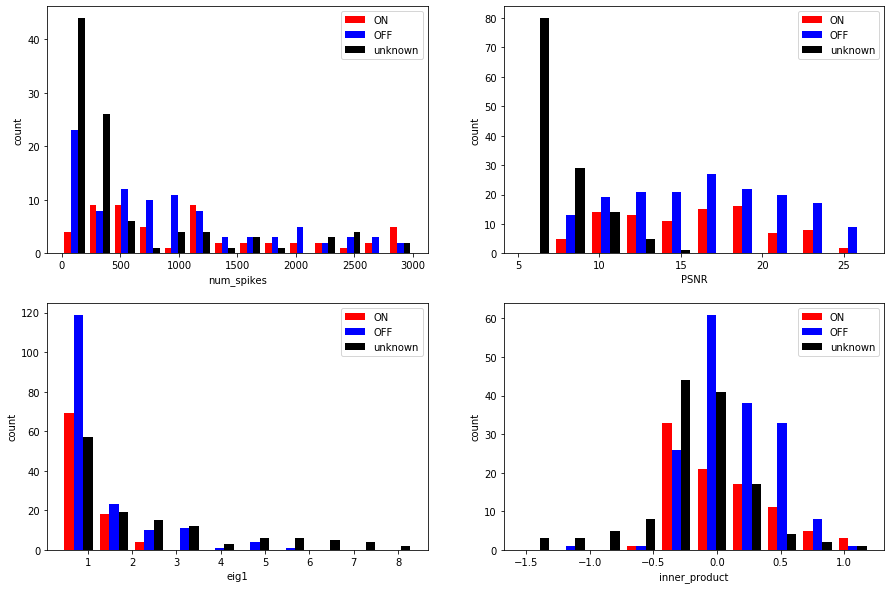

In [7]:
# check stats
plt.figure(figsize=(15,10))
plt.subplot(221)

pysta.plot_hist_by_cell_type(cluster, "num_spikes", bins=np.linspace(0,3000,15))
plt.subplot(222)
pysta.plot_hist_by_cell_type(cluster, "PSNR")
plt.subplot(223)
pysta.plot_hist_by_cell_type(cluster, "eig1")
plt.subplot(224)
pysta.plot_hist_by_cell_type(cluster, "inner_product")

plt.savefig("figure/combined_cluster_dim{}_stat.pdf".format(cluster_dim))
plt.savefig("figure/combined_cluster_dim{}_stat.png".format( cluster_dim))

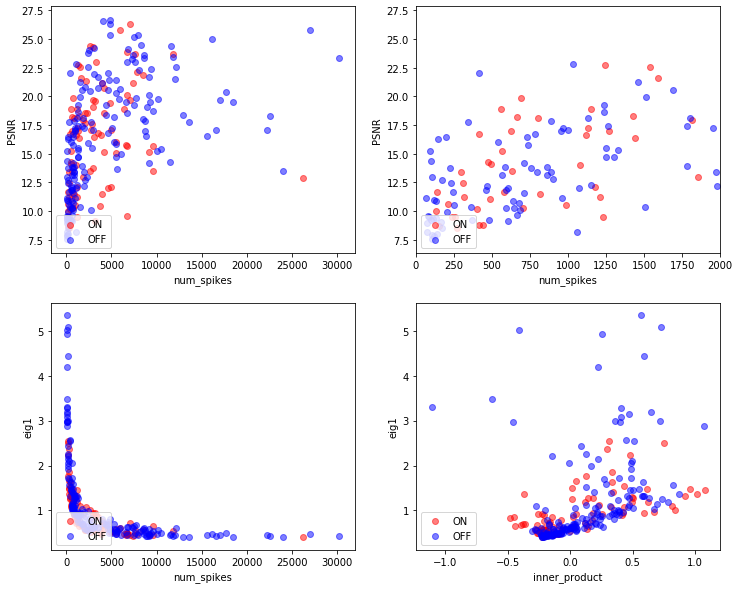

In [12]:
def plot_scatter(cluster):
    plt.figure(figsize=(12,10))
    plt.subplot(221)
    pysta.plot_scatter_by_group(cluster, ["num_spikes", "PSNR"], 
                                "cell_type", ["ON", "OFF"], ["r","b"])

    plt.subplot(222)
    pysta.plot_scatter_by_group(cluster, ["num_spikes", "PSNR"], 
                                "cell_type", ["ON", "OFF"], ["r","b"])
    plt.xlim(0,2000)
    
    plt.subplot(223)
    pysta.plot_scatter_by_group(cluster, ["num_spikes", "eig1"], 
                                "cell_type", ["ON", "OFF"], ["r","b"])
#     plt.xscale('log')
#     plt.yscale('log')

    plt.subplot(224)
    pysta.plot_scatter_by_group(cluster, ["inner_product", "eig1"], 
                                "cell_type", ["ON", "OFF"])
    
    
def plot_compare_scatter_(cluster):
    plt.subplot(233)
    pysta.plot_scatter_by_group(cluster, ["num_spikes", "inner_product"], ["ON", "OFF"])
    plt.xscale('log')
    # plt.yscale('log')

    plt.subplot(234)
    pysta.plot_scatter_by_goup(cluster, ["PSNR", "PSNR1"], ["ON", "OFF"])
    plt.plot([7.5,25], [7.5,25], 'k--')

    plt.subplot(235)
    pysta.plot_scatter_by_group(cluster, ["PSNR", "PSNR2"], ["ON", "OFF"])
    plt.plot([7.5,25], [7.5,25], 'k--')

plot_scatter(cluster)

plt.savefig("figure/combined_cluster_dim{}_PSNR_eig1.pdf".format(cluster_dim))
plt.savefig("figure/combined_cluster_dim{}_PSNR_eig1".format( cluster_dim))


## select channels with enough spikes

In [13]:
# with enough spikes
spike_per_dim = 2 # hyper parameter that I get to choose
# spike_per_dim = 4 # hyper parameter that I get to choose

idx_enough_spikes = cluster["num_spikes"]>512*spike_per_dim
cluster_with_enough_spikes = cluster.loc[idx_enough_spikes]

print("total = ", len(cluster_with_enough_spikes))
print(cluster_with_enough_spikes["cell_type"].value_counts())
print(cluster_with_enough_spikes["cell_type"].value_counts() / len(cluster_with_enough_spikes))


total =  218
OFF        107
ON          63
unknown     48
Name: cell_type, dtype: int64
OFF        0.490826
ON         0.288991
unknown    0.220183
Name: cell_type, dtype: float64


In [14]:
cluster_with_enough_spikes

channel_name  num_spikes cell_type       PSNR      eig1      eig2  \
0            12a        1978       OFF  12.186541  0.971392  0.754007   
1            12b        1228        ON   9.526389  0.920008  0.895442   
7            14a        5973        ON  25.775064  0.620785  0.571746   
8            14b        1212        ON  11.186482  0.795804  0.766490   
9            17a        5929   unknown   8.452868  0.436700  0.434049   
..           ...         ...       ...        ...       ...       ...   
145          83b        1300       OFF  14.727492  0.879242  0.851718   
149          86a        3186        ON  19.576154  0.952703  0.766365   
150          86b        1684   unknown   6.779709  0.788005  0.759195   
153          87a        9120       OFF  21.676952  0.590420  0.517161   
154          87b        3797        ON  16.662341  0.487358  0.482080   

         eig3  converged      PSNR1      PSNR2   weight1   weight2  \
0    0.737358       True  11.450823  10.235904  0.636834  0.363166   
1    0.871839       True   9.419680   7.839765  0.662558  0.337442   
7    0.562778       True  25.702134  15.884281  0.598530  0.401470   
8    0.746218       True  11.501885  10.593278  0.516448  0.483552   
9    0.430598       True   6.269053   5.988208  0.504045  0.495955   
..        ...        ...        ...        ...       ...       ...   
145  0.813824       True  14.368050  10.560972  0.570767  0.429233   
149  0.749286       True   9.892318  19.695189  0.276750  0.723250   
150  0.735989       True   6.928302   6.117002  0.336812  0.663188   
153  0.512286       True  19.043271  14.230278  0.600327  0.399673   
154  0.475510       True   9.090881  12.160747  0.469121  0.530879   

     inner_product   dataset  
0         0.420599  20180618  
1         0.255689  20180618  
7        -0.206751  20180618  
8        -0.076766  20180618  
9        -0.251180  20180618  
..             ...       ...  
145       0.310200  20180626  
149       0.588351  20180626  
150      -0.003025  20180626  
153       0.056832  20180626  
154      -0.128974  20180626  

[218 rows x 14 columns]

In [15]:
cluster.groupby("cell_type").mean()

num_spikes       PSNR      eig1      eig2      eig3  converged  \
cell_type                                                                    
OFF        4555.485207  16.585761  1.177086  1.092602  1.045497       True   
ON         3263.219780  16.092398  0.931845  0.868955  0.839521       True   
unknown    2894.542636   7.353616  2.256193  2.006904  1.901224       True   

               PSNR1      PSNR2   weight1   weight2  inner_product  
cell_type                                                           
OFF        12.405428  10.314392  0.561508  0.438492       0.119448  
ON         12.794743  10.525676  0.544275  0.455725       0.064662  
unknown     6.393611   6.232177  0.508012  0.491988      -0.164181

In [16]:
cluster_with_enough_spikes.groupby("cell_type").mean()

num_spikes       PSNR      eig1      eig2      eig3  converged  \
cell_type                                                                    
OFF        6937.392523  19.111556  0.633865  0.595912  0.585728       True   
ON         4505.904762  17.626240  0.689674  0.631703  0.618905       True   
unknown    7352.833333   8.646231  0.557443  0.540522  0.532966       True   

               PSNR1      PSNR2   weight1   weight2  inner_product  
cell_type                                                           
OFF        14.264644  11.867078  0.527833  0.472167      -0.005972  
ON         14.084539  11.719460  0.520161  0.479839      -0.057250  
unknown     7.407023   7.417590  0.484523  0.515477      -0.212582

In [17]:
cluster_with_enough_spikes.groupby("cell_type").median()

num_spikes       PSNR      eig1      eig2      eig3  converged  \
cell_type                                                                   
OFF              5468  19.283938  0.592556  0.550488  0.547742       True   
ON               3530  17.556724  0.620785  0.571746  0.562778       True   
unknown          4509   8.524369  0.501406  0.496299  0.489568       True   

               PSNR1      PSNR2   weight1   weight2  inner_product  
cell_type                                                           
OFF        14.818749  11.367329  0.530009  0.469991      -0.057038  
ON         12.863225  10.385613  0.523884  0.476116      -0.192967  
unknown     6.505627   6.171815  0.496612  0.503388      -0.243094

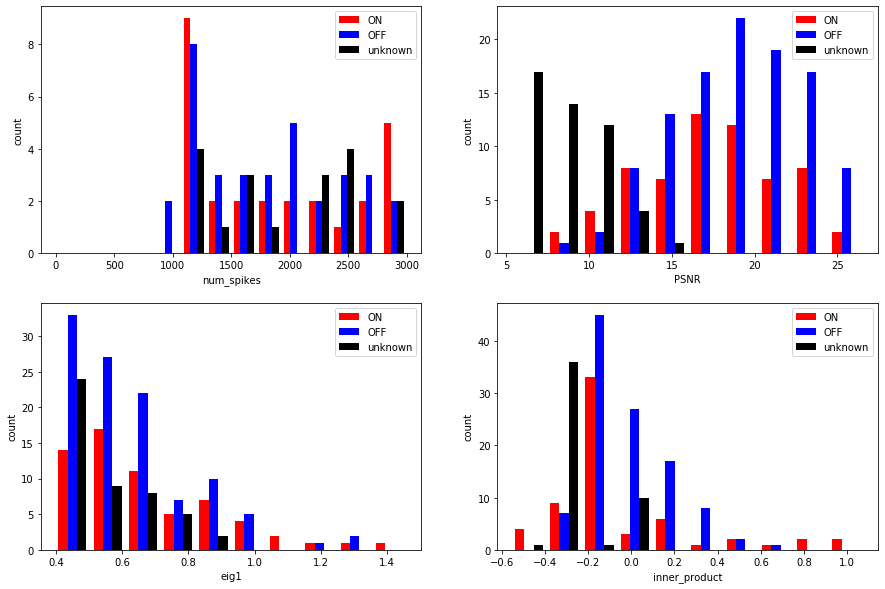

In [18]:
# check stats
plt.figure(figsize=(15,10))
plt.subplot(221)
pysta.plot_hist_by_cell_type(cluster_with_enough_spikes, "num_spikes", bins=np.linspace(0,3000,15))
plt.subplot(222)
pysta.plot_hist_by_cell_type(cluster_with_enough_spikes, "PSNR")
plt.subplot(223)
pysta.plot_hist_by_cell_type(cluster_with_enough_spikes, "eig1")
plt.subplot(224)
pysta.plot_hist_by_cell_type(cluster_with_enough_spikes, "inner_product")

plt.savefig("figure/combined_cluster_dim{}_spd{}_enough_spikes_stat.pdf".format(cluster_dim,spike_per_dim))
plt.savefig("figure/combined_cluster_dim{}_spd{}_enough_spikes_stat.png".format(cluster_dim,spike_per_dim))

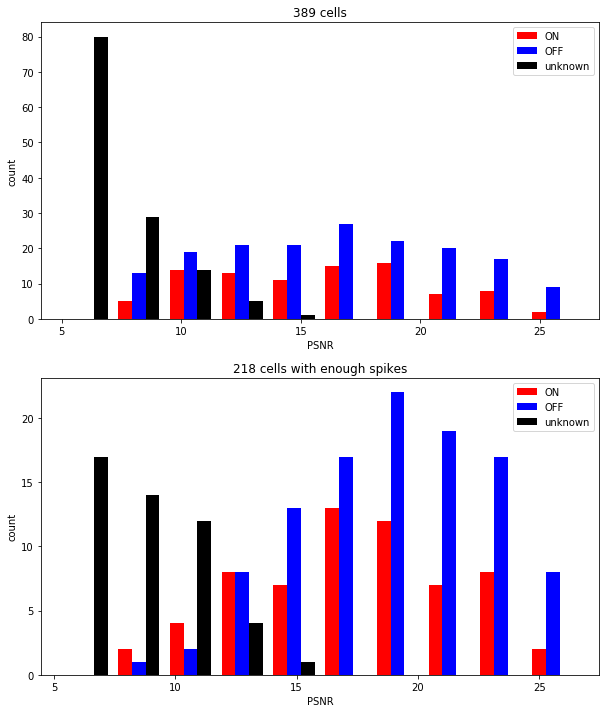

In [19]:
col_name = "PSNR"
plt.figure(figsize=(10,12))
plt.subplot(211)
pysta.plot_hist_by_cell_type(cluster, col_name)
plt.title("{} cells".format(len(cluster)))
plt.subplot(212)
pysta.plot_hist_by_cell_type(cluster_with_enough_spikes, col_name)
plt.title("{} cells with enough spikes".format(len(cluster_with_enough_spikes)))

plt.legend()

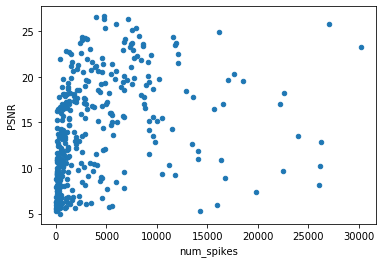

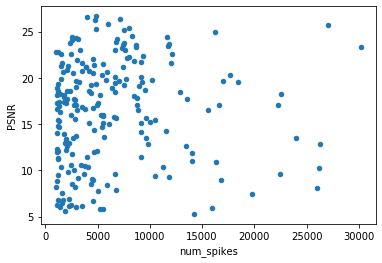

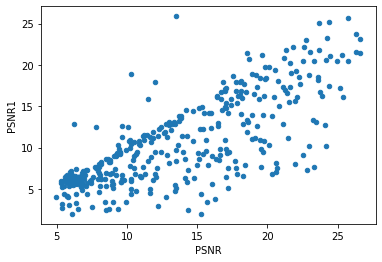

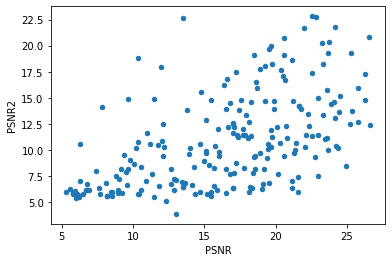

In [20]:
cluster.plot.scatter("num_spikes", "PSNR")
cluster_with_enough_spikes.plot.scatter("num_spikes", "PSNR")

cluster.plot.scatter("PSNR", "PSNR1")
cluster_with_enough_spikes.plot.scatter("PSNR", "PSNR2")


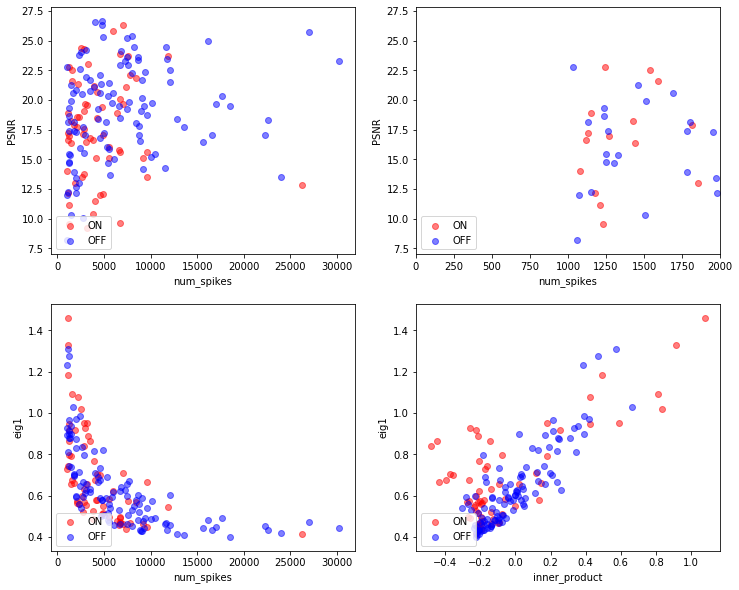

In [21]:
plot_scatter(cluster_with_enough_spikes)

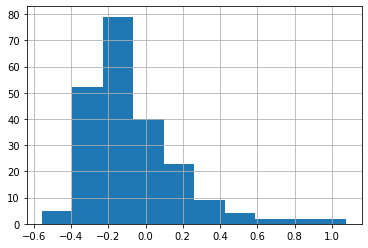

In [22]:
cluster_with_enough_spikes["inner_product"].hist()

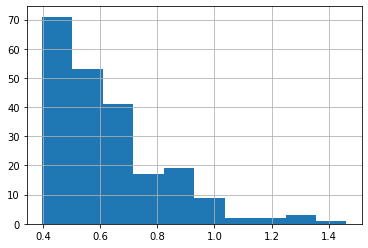

In [23]:
cluster_with_enough_spikes["eig1"].hist()

In [24]:
# idx_on = cluster_with_enough_spikes["cell_type"] == "ON"
# idx_off = cluster_with_enough_spikes["cell_type"] == "OFF"
# idx_unknown = cluster_with_enough_spikes["cell_type"] == "unknown"

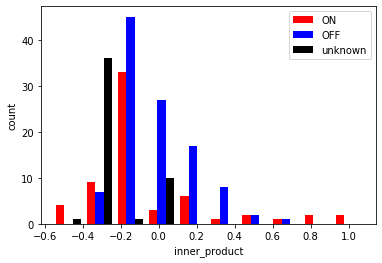

In [25]:
pysta.plot_hist_by_cell_type(cluster_with_enough_spikes, "inner_product")
plt.savefig('figure/combined_cluster_dim{}_spd{}_inner_product_hist.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/combined_cluster_dim{}_spd{}_inner_product_hist.png'.format(cluster_dim,spike_per_dim))

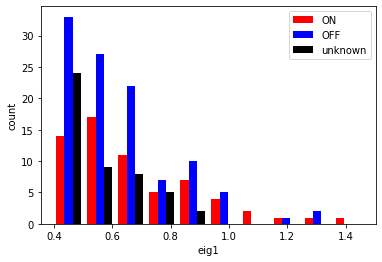

In [26]:
pysta.plot_hist_by_cell_type(cluster_with_enough_spikes, "eig1")

Text(0, 0.5, '1st eigenvalue')

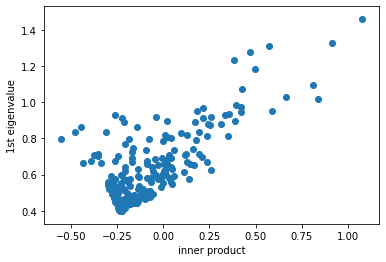

In [27]:
plt.scatter(cluster_with_enough_spikes["inner_product"], cluster_with_enough_spikes["eig1"])
plt.xlabel('inner product')
plt.ylabel('1st eigenvalue')

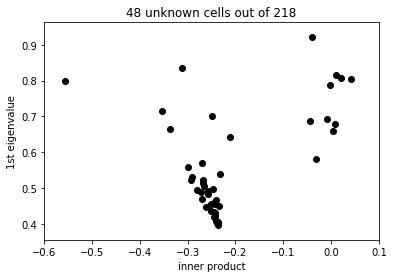

In [28]:
idx_unknown = cluster_with_enough_spikes["cell_type"] == "unknown"

plt.scatter(cluster_with_enough_spikes.loc[idx_unknown,"inner_product"], cluster_with_enough_spikes.loc[idx_unknown,"eig1"], c="k")
plt.xlabel('inner product')
plt.ylabel('1st eigenvalue')

plt.xticks([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1])
plt.title ("{} unknown cells out of {}".format(np.sum(idx_unknown),len(cluster_with_enough_spikes)))
plt.savefig('figure/combined_cluster_dim{}_spd{}_inner_product_vs_eig1_unknown.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/combined_cluster_dim{}_spd{}_inner_product_vs_eig1_unknown.png'.format(cluster_dim,spike_per_dim))

218
OFF        107
ON          63
unknown     48
Name: cell_type, dtype: int64
OFF        0.490826
ON         0.288991
unknown    0.220183
Name: cell_type, dtype: float64


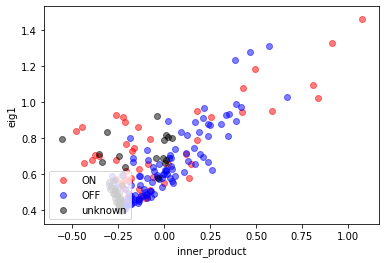

In [33]:
# def plot_inner_product_vs_eig1(cluster):
#     idx_on = cluster["cell_type"] == "ON"
#     idx_off = cluster["cell_type"] == "OFF"
#     idx_unknown = cluster["cell_type"] == "unknown"

#     plt.scatter(cluster.loc[idx_on,"inner_product"], cluster.loc[idx_on,"eig1"], c="r")
#     plt.scatter(cluster.loc[idx_off,"inner_product"], cluster.loc[idx_off,"eig1"], c="b")
#     plt.scatter(cluster.loc[idx_unknown,"inner_product"], cluster.loc[idx_unknown,"eig1"], c="k")
#     plt.xlabel('inner product')
#     plt.ylabel('1st eigenvalue')

#     plt.title ("ON:{}, OFF:{}, unknown:{}".format(np.sum(idx_on),np.sum(idx_off),np.sum(idx_unknown)))

#     plt.legend(["ON", "OFF", "unknown"])
    

print(len(cluster_with_enough_spikes))
print(cluster_with_enough_spikes["cell_type"].value_counts())
print(cluster_with_enough_spikes["cell_type"].value_counts()/len(cluster_with_enough_spikes))

pysta.plot_scatter_by_group(cluster_with_enough_spikes,
                            ["inner_product", "eig1"])

# plt.xticks([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1])


plt.savefig('figure/combined_cluster_dim{}_spd{}_inner_product_vs_eig1.pdf'.format(cluster_dim, spike_per_dim))
plt.savefig('figure/combined_cluster_dim{}_spd{}_inner_product_vs_eig1.png'.format(cluster_dim, spike_per_dim))

In [34]:
cluster_with_enough_spikes.sort_values('inner_product').head(30)#.sort_values("dataset")
# cluster_with_enough_samples.sort_values(['dataset','inner_product'])

channel_name  num_spikes cell_type       PSNR      eig1      eig2  \
64           36c        4098   unknown  10.318830  0.798256  0.620102   
24           22a        2860        ON  17.556724  0.838246  0.704459   
38           32b        3530        ON  16.838700  0.862429  0.749463   
44           35a        9638        ON  13.477084  0.665520  0.552200   
109          85b        4002        ON  11.494061  0.678136  0.597015   
43           34b        4208        ON  18.520772  0.706069  0.597161   
22           23b        4619        ON  11.990694  0.700543  0.608037   
35           27a        1097   unknown   6.304380  0.715303  0.708110   
46           36b        1912   unknown   5.589969  0.665810  0.652388   
25           22b        2413   unknown   6.267735  0.835159  0.782430   
67           37b        9568       OFF  18.715314  0.542621  0.476537   
65           46b        2306   unknown   6.176081  0.558057  0.554718   
104          56b        2961   unknown   6.055893  0.521560  0.518974   
104          77a        2879   unknown   8.146201  0.531850  0.520963   
86           46b        2762       OFF  10.083432  0.592556  0.580456   
64           46a        3505   unknown   6.157515  0.495557  0.494839   
57           42b        8472        ON  21.819161  0.567641  0.502737   
109          62b        2308       OFF  12.982289  0.559727  0.550488   
10           17c        5516   unknown   5.800503  0.489674  0.481081   
45           36a        5207   unknown   5.783477  0.468460  0.461560   
10           17b        2553   unknown   8.515376  0.570595  0.559954   
75           54c        3407   unknown  10.567115  0.522441  0.521627   
26           26c        6699        ON  20.090976  0.498963  0.470083   
18           23b        4379   unknown   8.533363  0.514523  0.505090   
28           27b        5059   unknown   7.714152  0.505017  0.497758   
122          71b        7557        ON  23.712959  0.575136  0.510658   
70           47b        1590        ON  21.610161  0.678190  0.638039   
6            16a       22460   unknown   9.654894  0.448151  0.420615   
76           54d        2966        ON  19.675728  0.927184  0.759760   
108          62a        4582   unknown   8.960171  0.491259  0.482335   

         eig3  converged      PSNR1      PSNR2   weight1   weight2  \
64   0.613533       True  18.892517  18.855896  0.524121  0.475879   
24   0.671715       True  18.716530  14.826105  0.647365  0.352635   
38   0.716215       True  17.936124  14.497231  0.647646  0.352354   
44   0.548982       True  25.869758  22.670575  0.553304  0.446696   
109  0.581718       True  15.846811  14.866739  0.515823  0.484177   
43   0.588002       True  21.493398  19.136803  0.566473  0.433527   
22   0.595794       True  17.952531  17.924992  0.526349  0.473651   
35   0.699494       True   5.554594   6.969691  0.498907  0.501093   
46   0.649845       True   6.105474   6.202762  0.459687  0.540313   
25   0.732217       True  12.865903  10.592013  0.380812  0.619188   
67   0.469468       True  20.694819  15.913280  0.518498  0.481502   
65   0.549498       True   6.285212   5.462719  0.509944  0.490056   
104  0.517117       True   7.118333   5.784867  0.491094  0.508906   
104  0.515625       True   6.164320   5.528953  0.488619  0.511381   
86   0.562291       True  12.540200   8.637063  0.502355  0.497645   
64   0.488377       True   5.433181   5.653084  0.509251  0.490749   
57   0.496190       True  22.212132  13.903167  0.540581  0.459419   
109  0.547940       True   8.101284   7.069528  0.503116  0.496884   
10   0.475638       True   5.812827   5.753450  0.504564  0.495436   
45   0.458992       True   6.601859   5.846144  0.495079  0.504921   
10   0.552507       True   5.333542   5.551068  0.495539  0.504461   
75   0.513524       True   6.781484   6.140869  0.490941  0.509059   
26   0.461593       True  19.790906  12.163867  0.533108  0.466892   
18   0.504289       True   6.892518   5.913261  0.509898  0.

## threshold by PSNRs & sort by inner product

In [35]:
PSNR_threshold = 8.5
idx_thresholded = (cluster_with_enough_spikes["inner_product"] < 0) & (cluster_with_enough_spikes["PSNR1"] > PSNR_threshold) & (cluster_with_enough_spikes["PSNR2"] > PSNR_threshold)
cluster_thresholded = cluster_with_enough_spikes.loc[idx_thresholded].sort_values('inner_product')

print(len(cluster_thresholded))
cluster_thresholded

66


channel_name  num_spikes cell_type       PSNR      eig1      eig2  \
64           36c        4098   unknown  10.318830  0.798256  0.620102   
24           22a        2860        ON  17.556724  0.838246  0.704459   
38           32b        3530        ON  16.838700  0.862429  0.749463   
44           35a        9638        ON  13.477084  0.665520  0.552200   
109          85b        4002        ON  11.494061  0.678136  0.597015   
..           ...         ...       ...        ...       ...       ...   
19           21a        3114       OFF  24.182765  0.655560  0.625129   
24           24b        4795       OFF  26.300102  0.580599  0.572773   
106          61a        8017       OFF  22.265948  0.531427  0.494167   
87           64b        8643       OFF  23.344654  0.602733  0.542088   
21           23a       12115       OFF  22.562123  0.604328  0.517577   

         eig3  converged      PSNR1      PSNR2   weight1   weight2  \
64   0.613533       True  18.892517  18.855896  0.524121  0.475879   
24   0.671715       True  18.716530  14.826105  0.647365  0.352635   
38   0.716215       True  17.936124  14.497231  0.647646  0.352354   
44   0.548982       True  25.869758  22.670575  0.553304  0.446696   
109  0.581718       True  15.846811  14.866739  0.515823  0.484177   
..        ...        ...        ...        ...       ...       ...   
19   0.608992       True  20.556893  13.068052  0.612136  0.387864   
24   0.567813       True  21.554035  14.774093  0.608840  0.391160   
106  0.482321       True  18.590000  13.462127  0.585662  0.414338   
87   0.536521       True  20.518699  13.344694  0.550941  0.449059   
21   0.516272       True  20.522708  11.367329  0.602274  0.397726   

     inner_product   dataset  
64       -0.555696  20180626  
24       -0.479533  20180626  
38       -0.449921  20180618  
44       -0.437553  20180618  
109      -0.394200  20180621  
..             ...       ...  
19       -0.028613  20180626  
24       -0.013308  20180618  
106      -0.012381  20180626  
87       -0.004678  20180618  
21       -0.002242  20180618  

[66 rows x 14 columns]

In [36]:
plot_inner_product_vs_eig1(cluster_thresholded)
# plt.savefig('figure/cluster_inner_product_vs_eig1_dim{}_spd{}.pdf'.format(dim,spike_per_dim))
# plt.savefig('figure/cluster_inner_product_vs_eig1_dim{}_spd{}.png'.format(dim,spike_per_dim))

NameError: name 'plot_inner_product_vs_eig1' is not defined

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


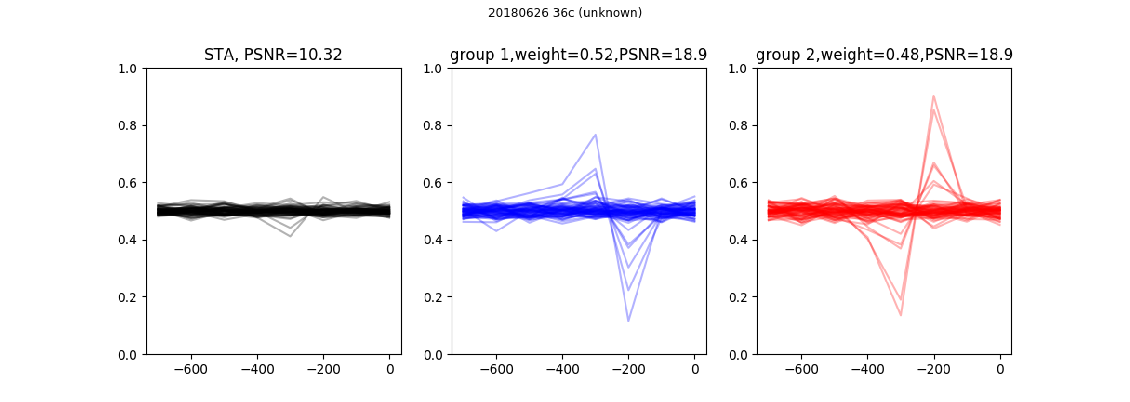

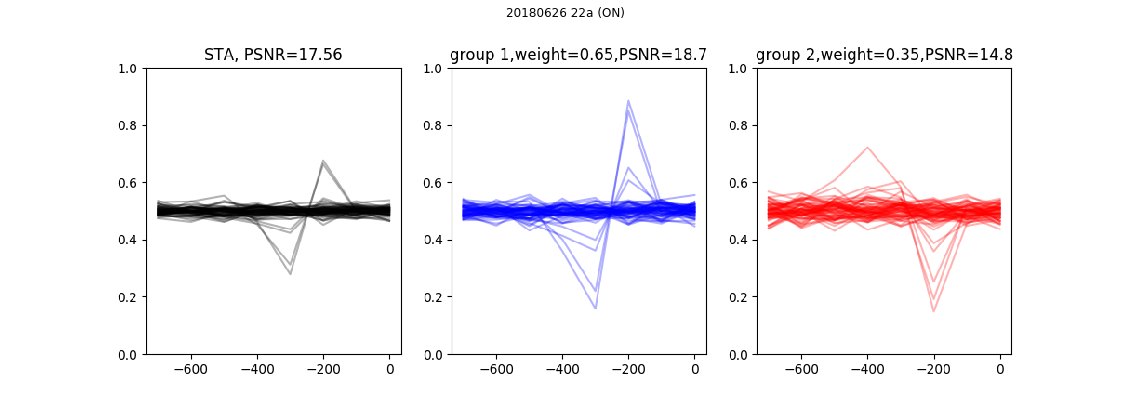

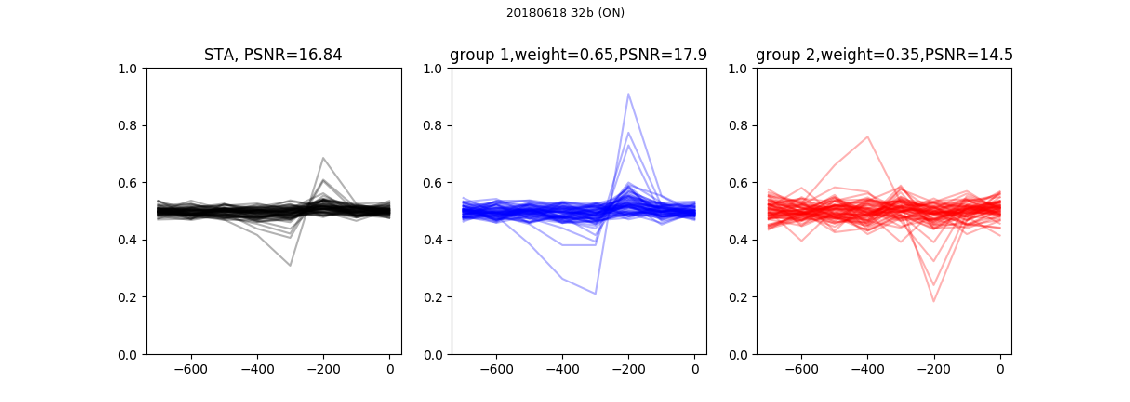

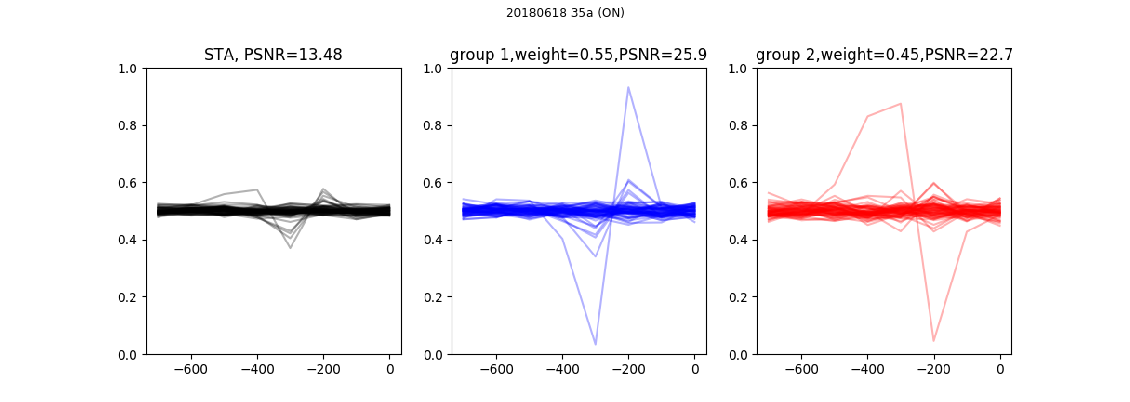

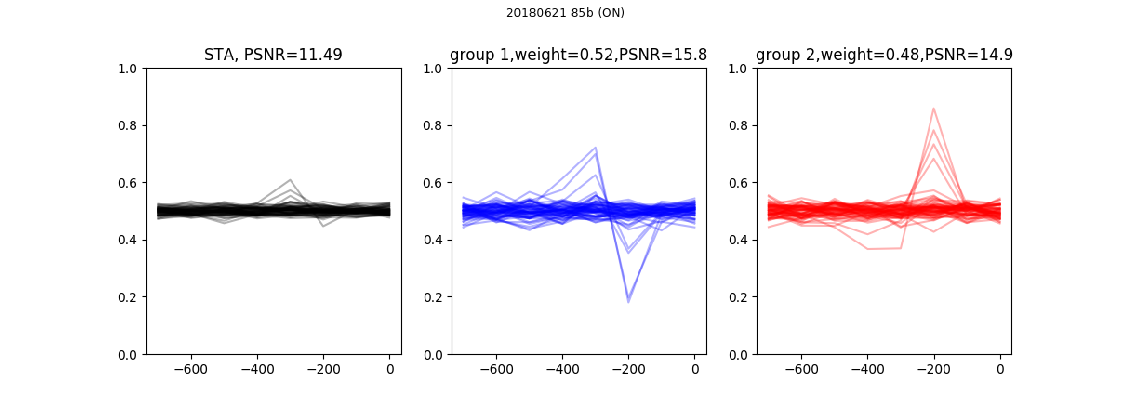

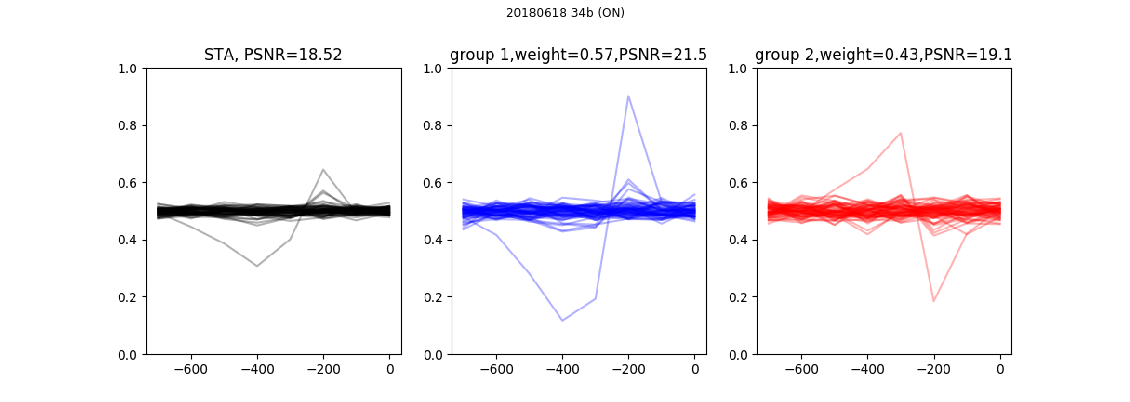

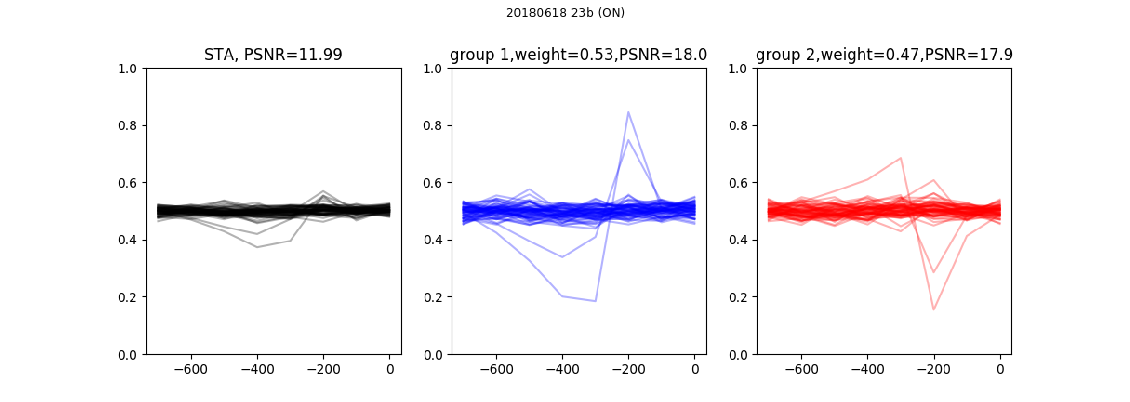

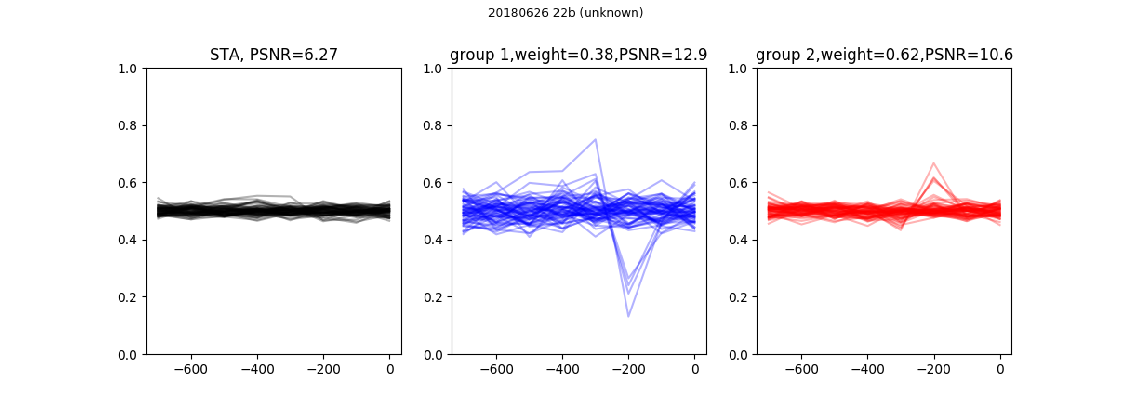

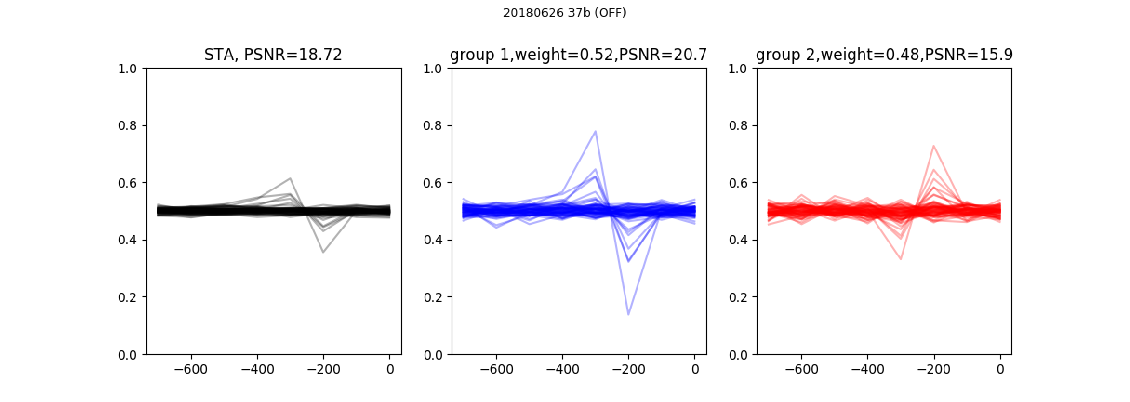

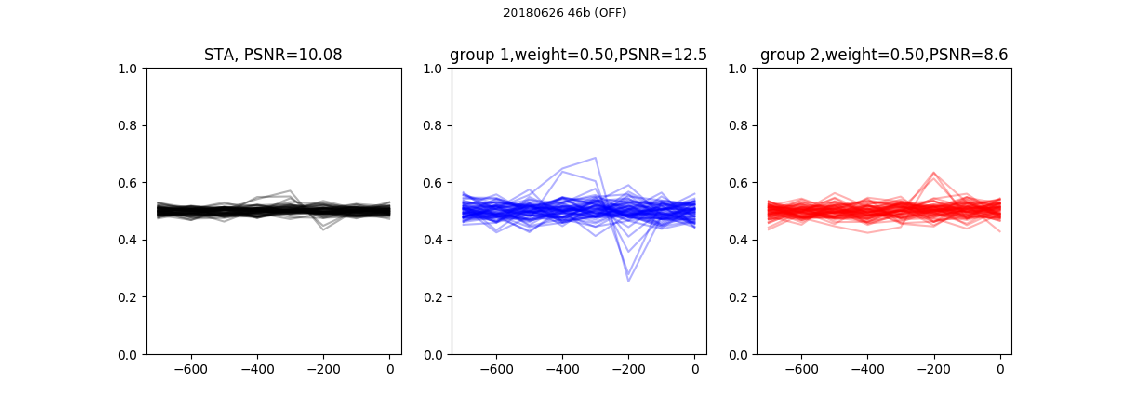

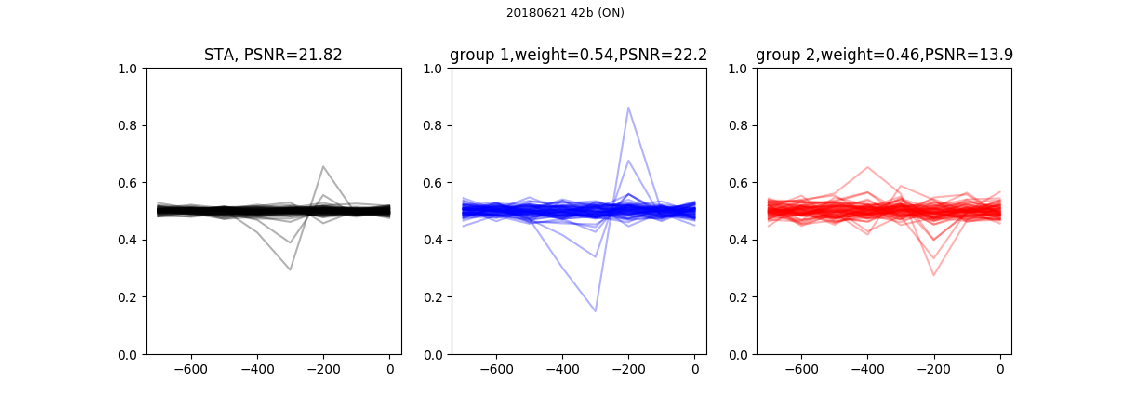

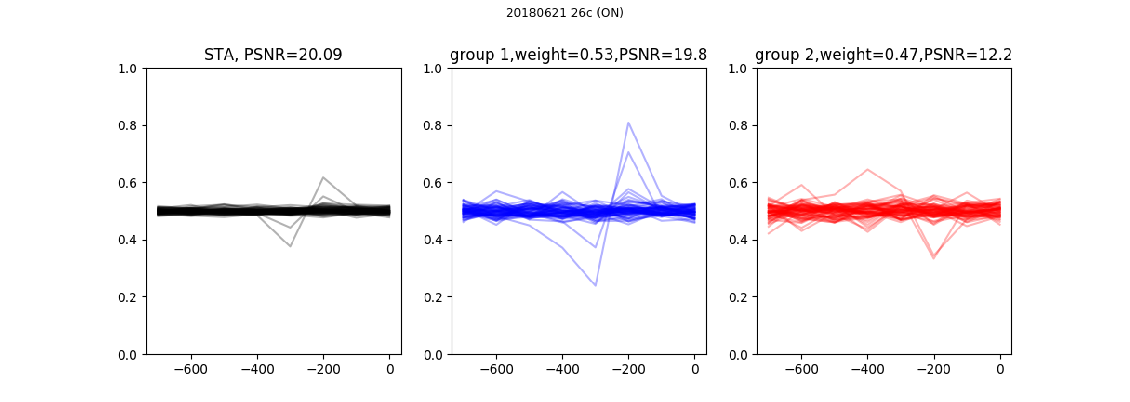

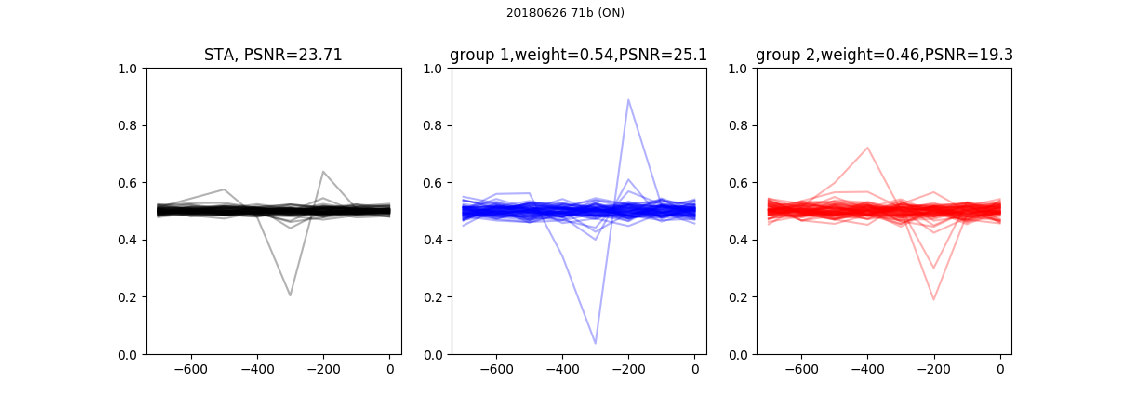

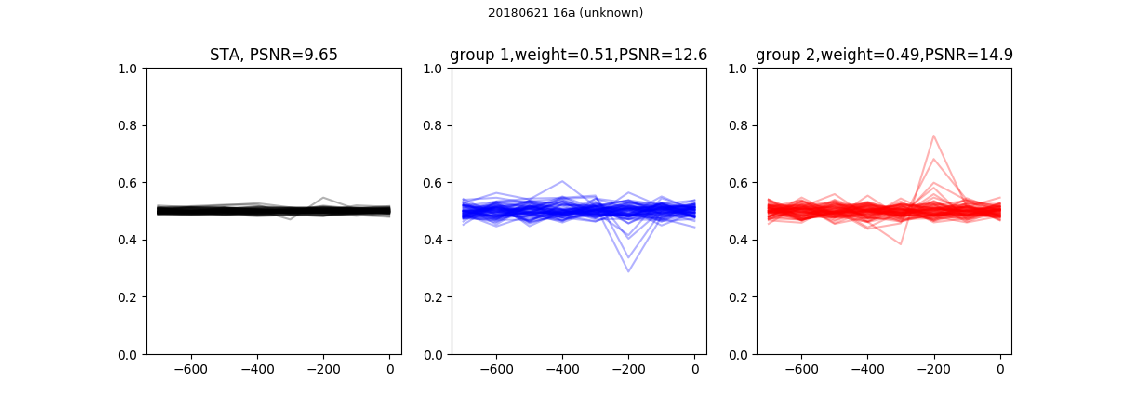

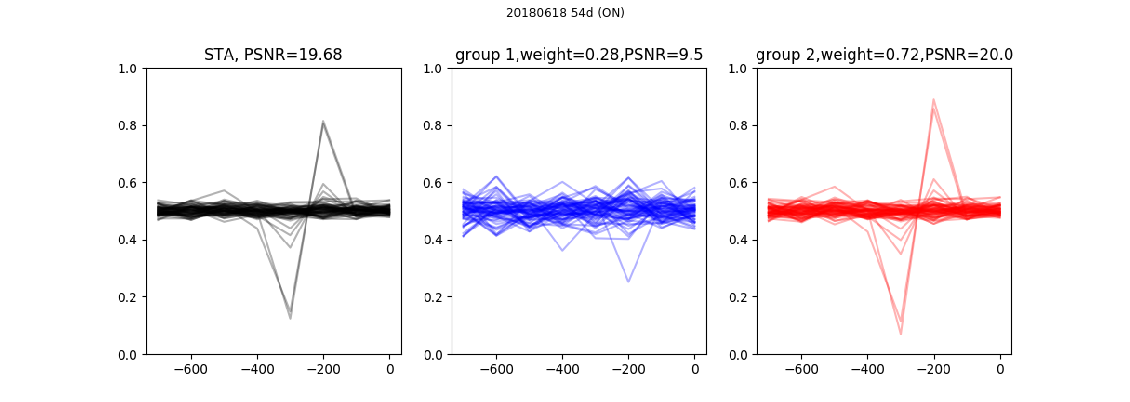

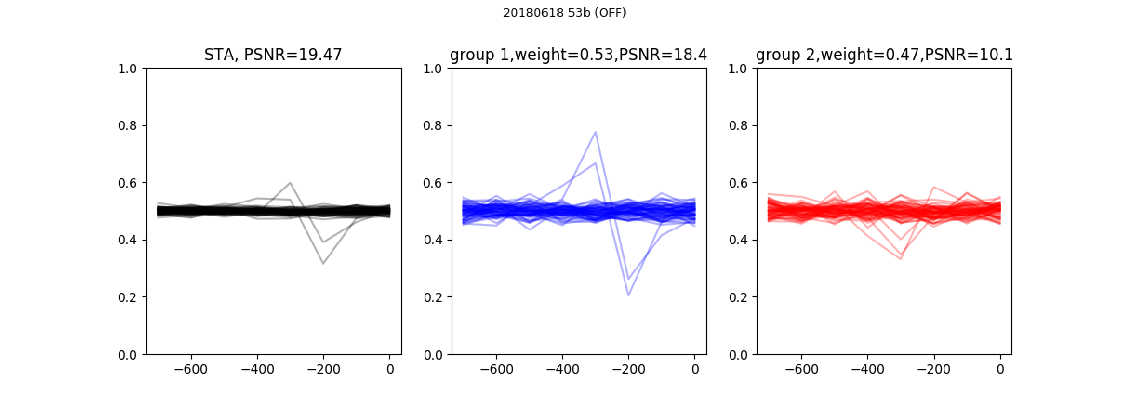

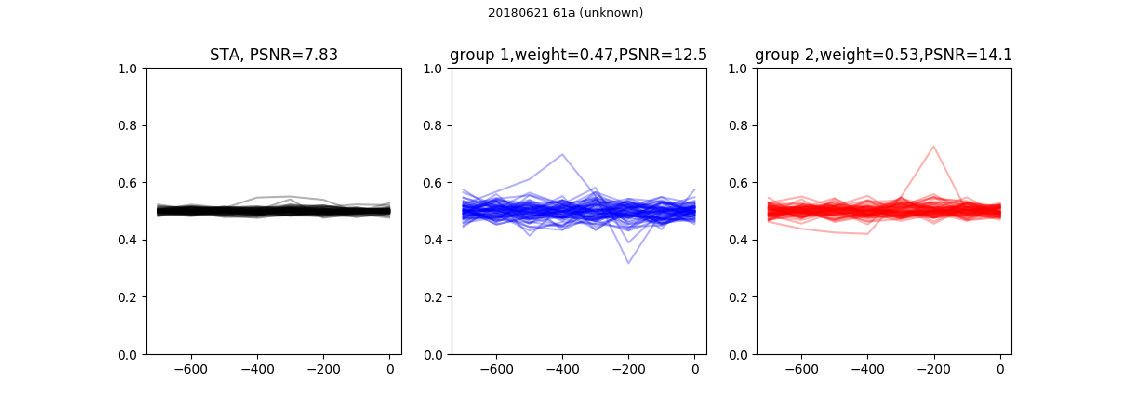

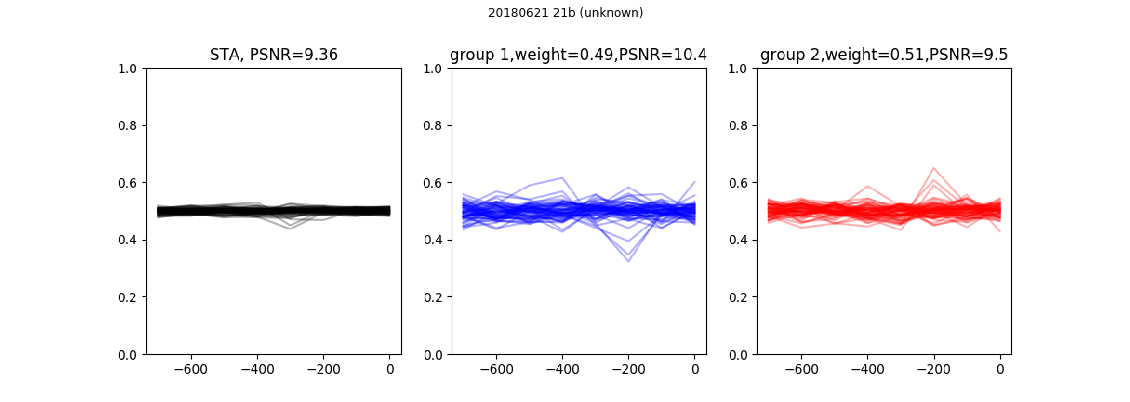

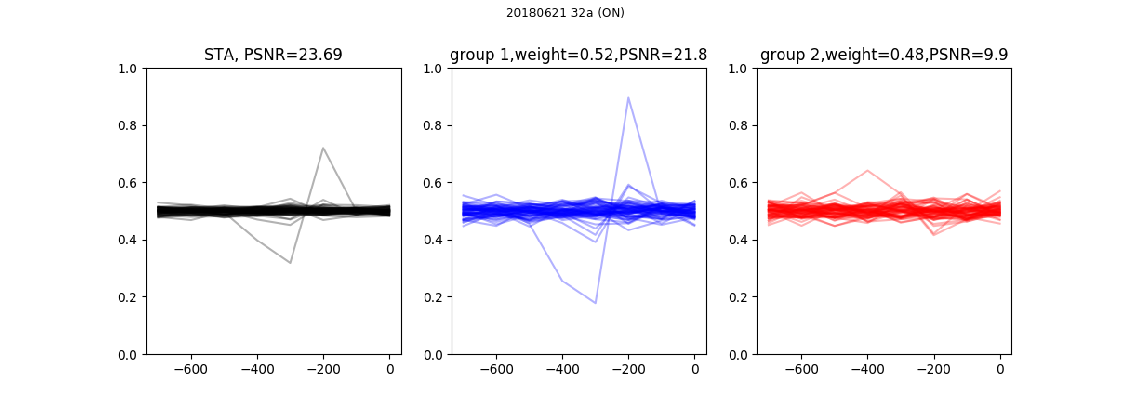

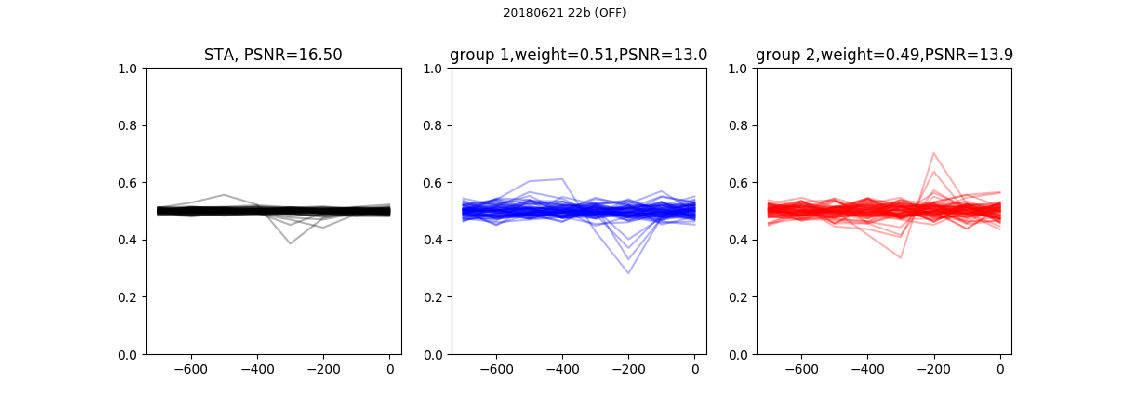

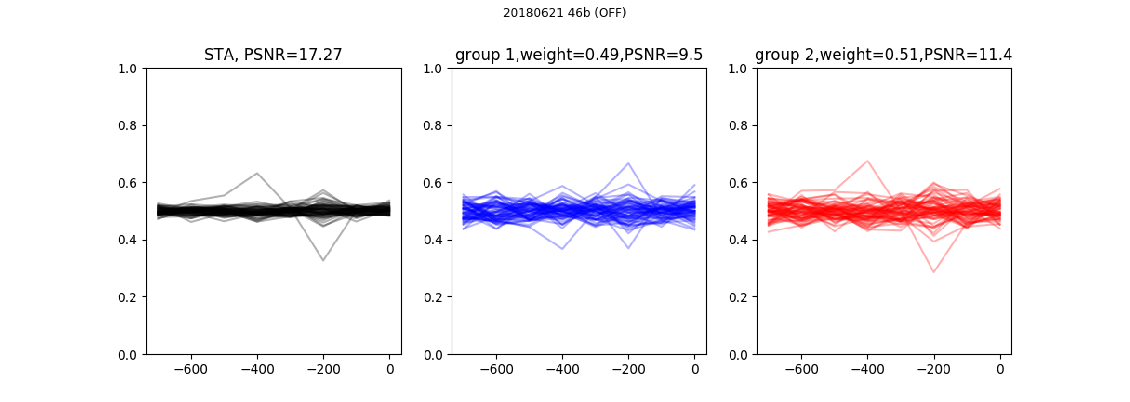

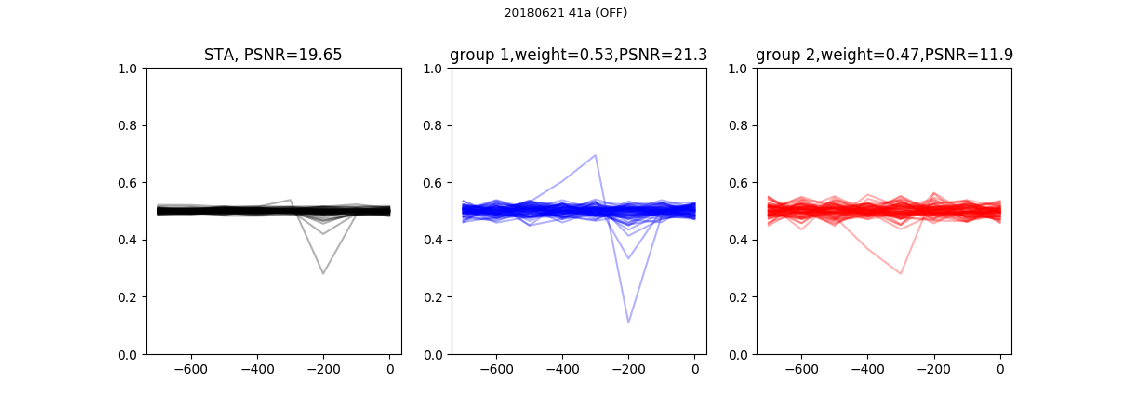

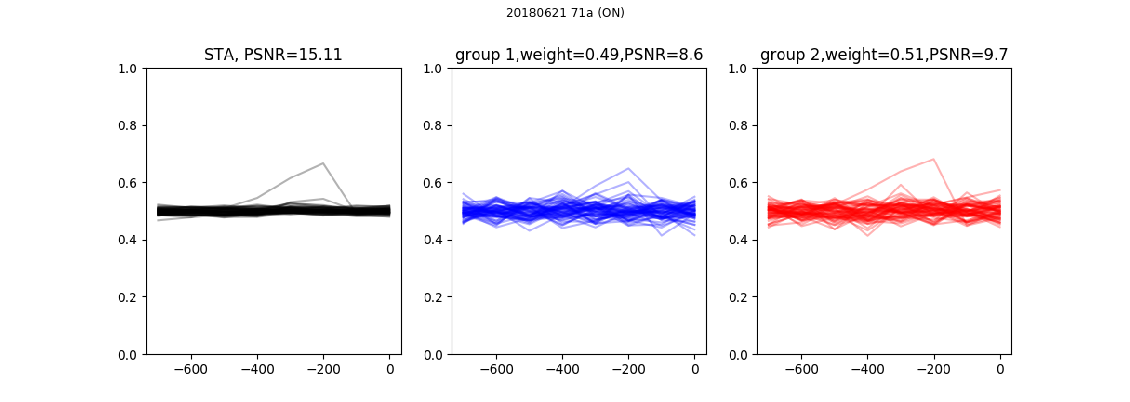

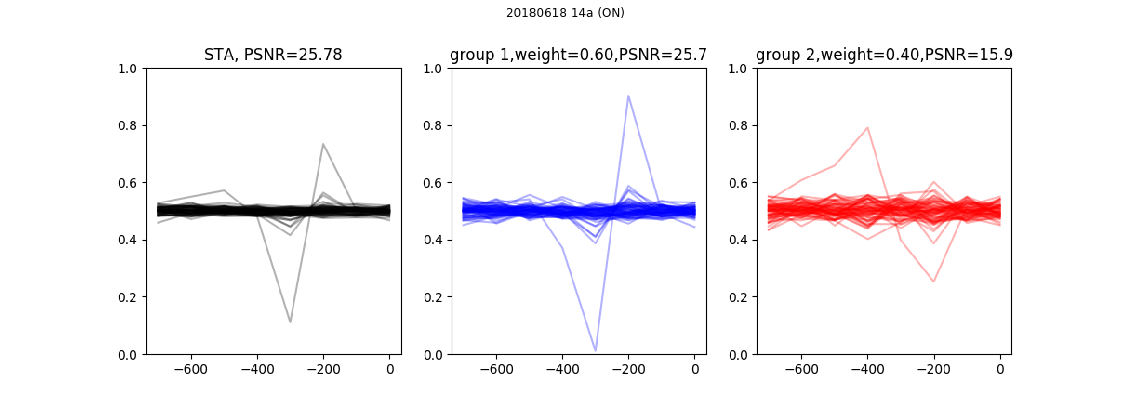

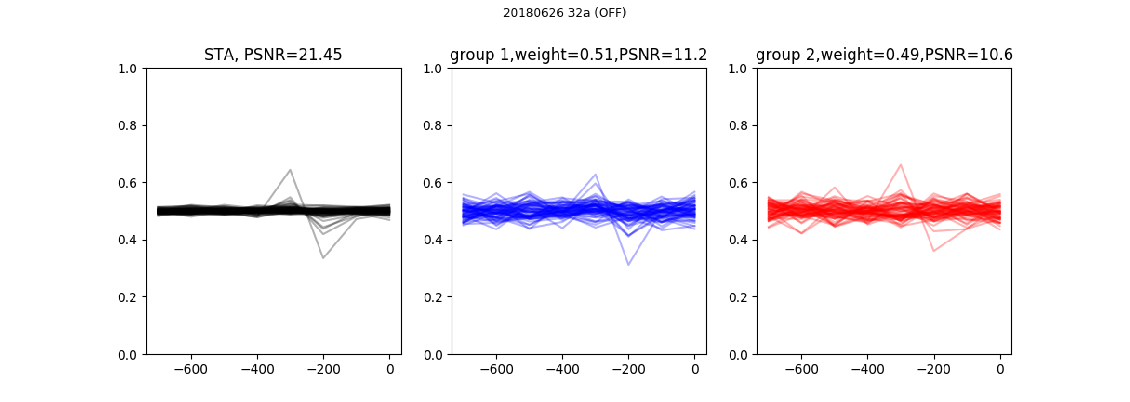

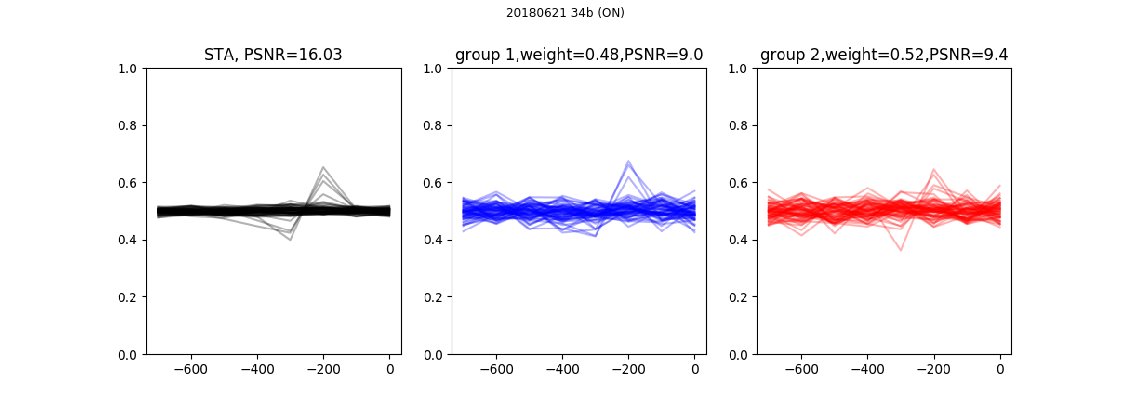

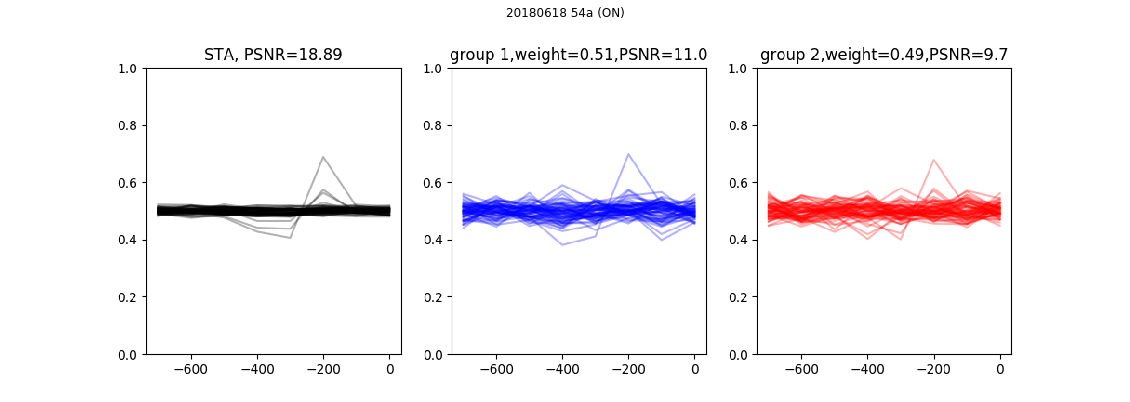

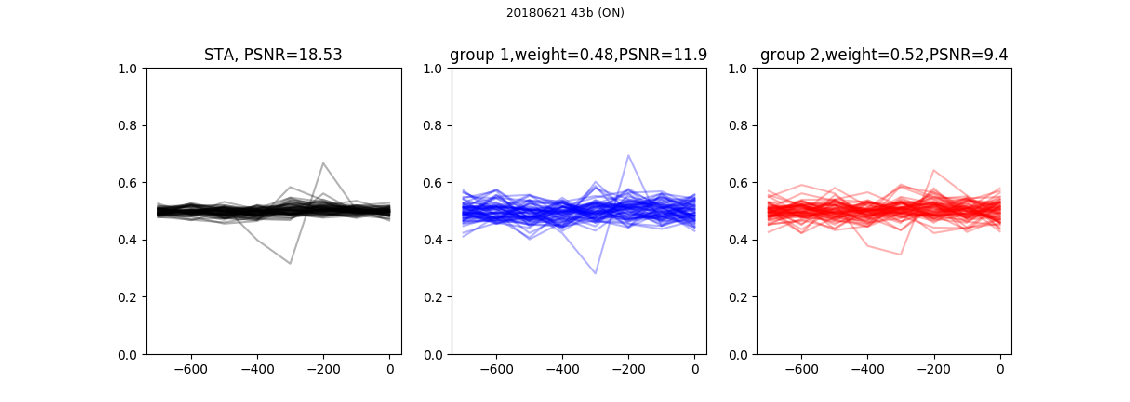

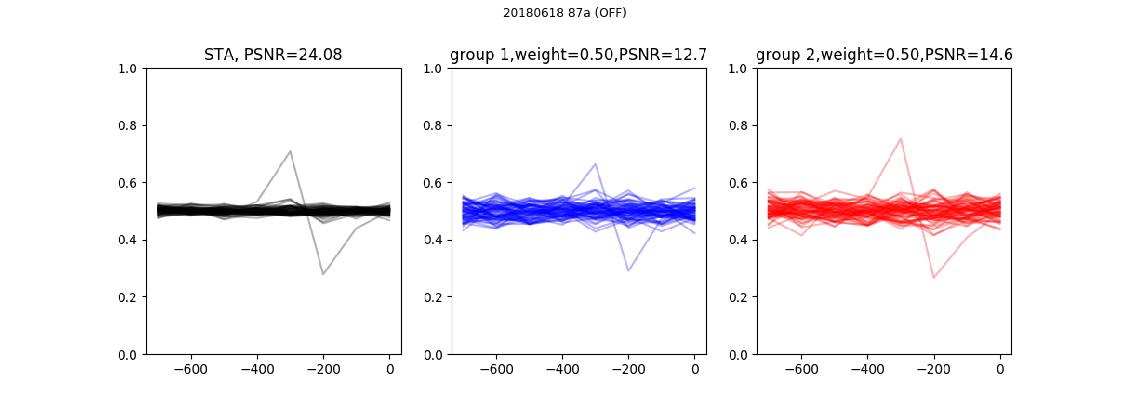

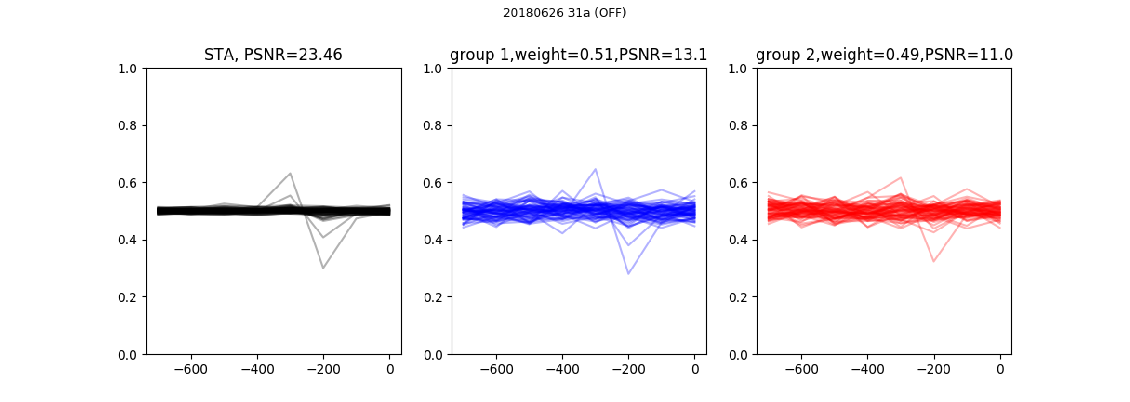

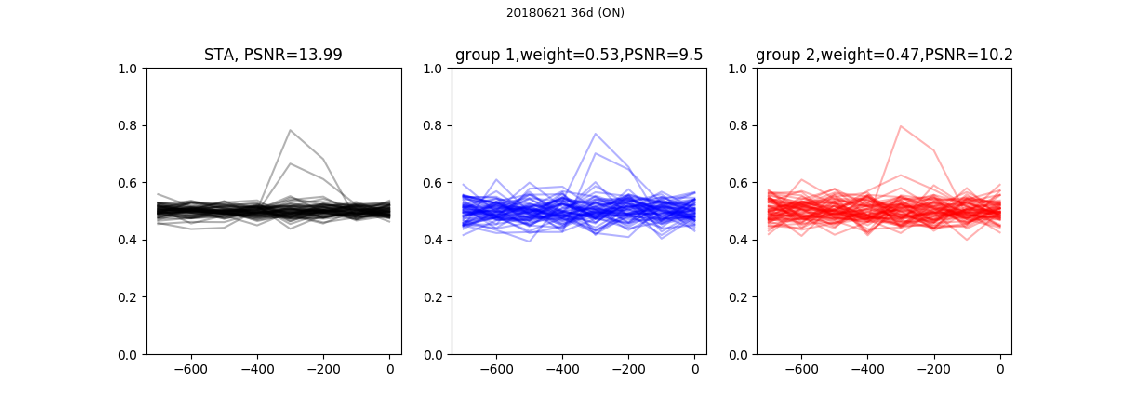

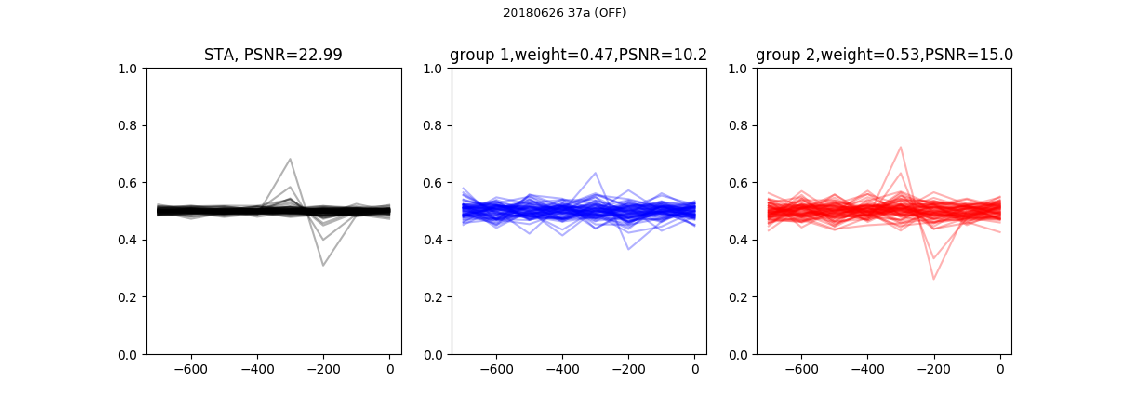

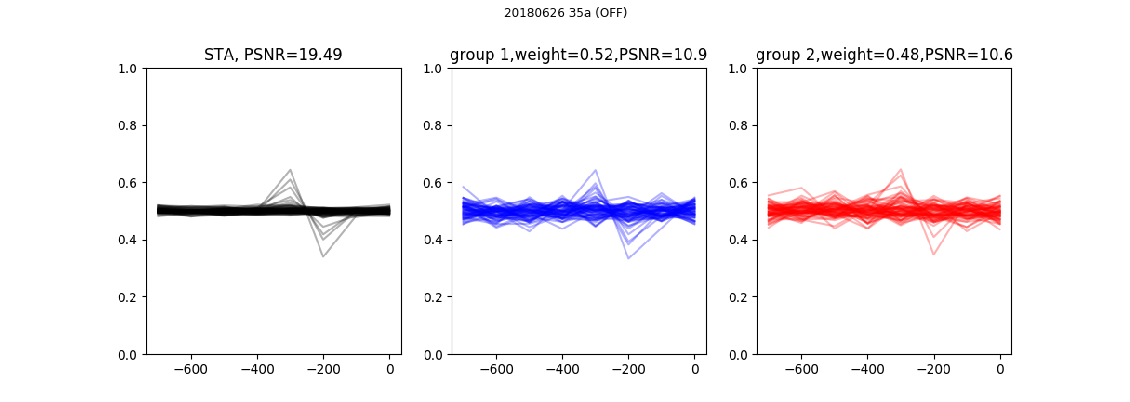

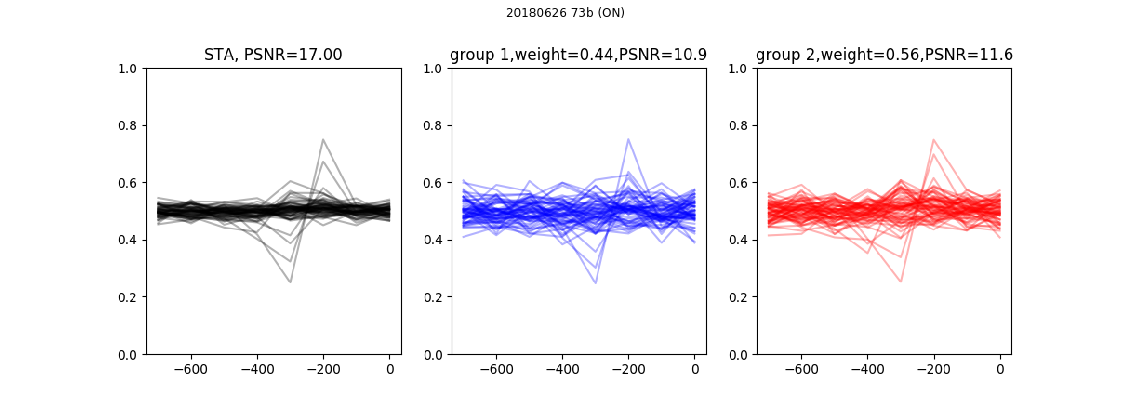

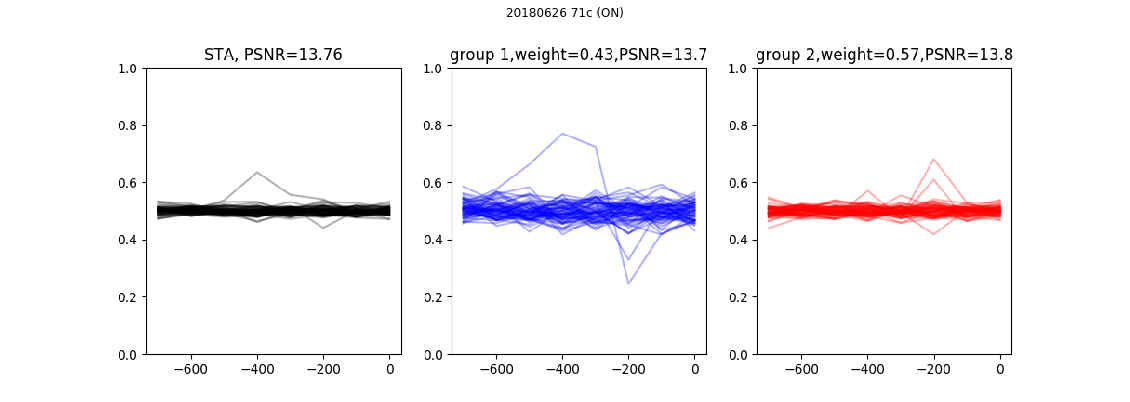

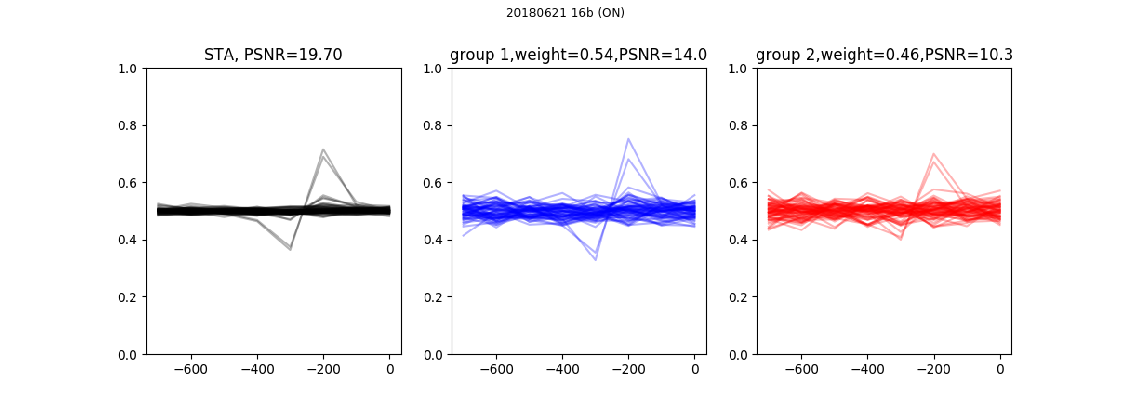

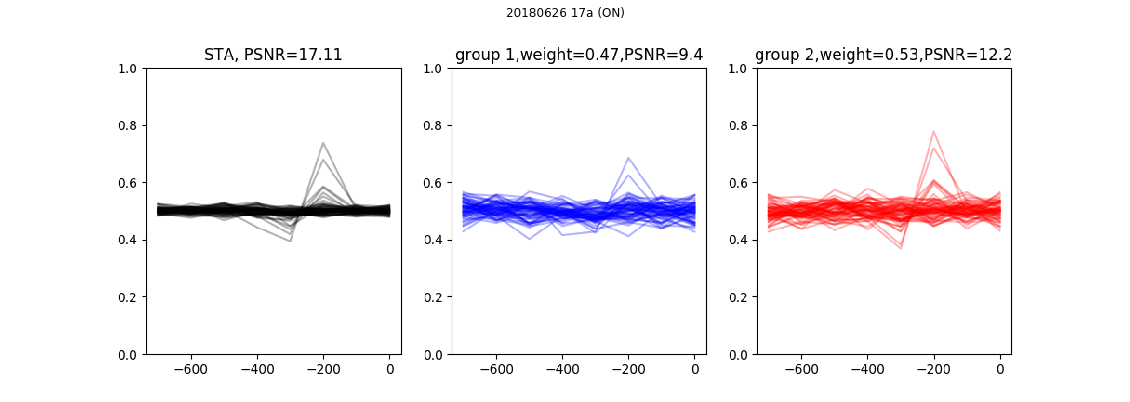

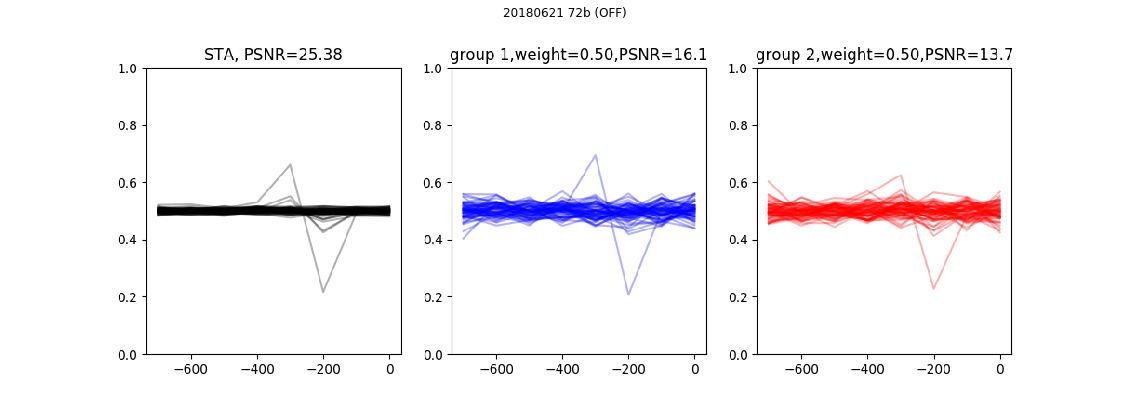

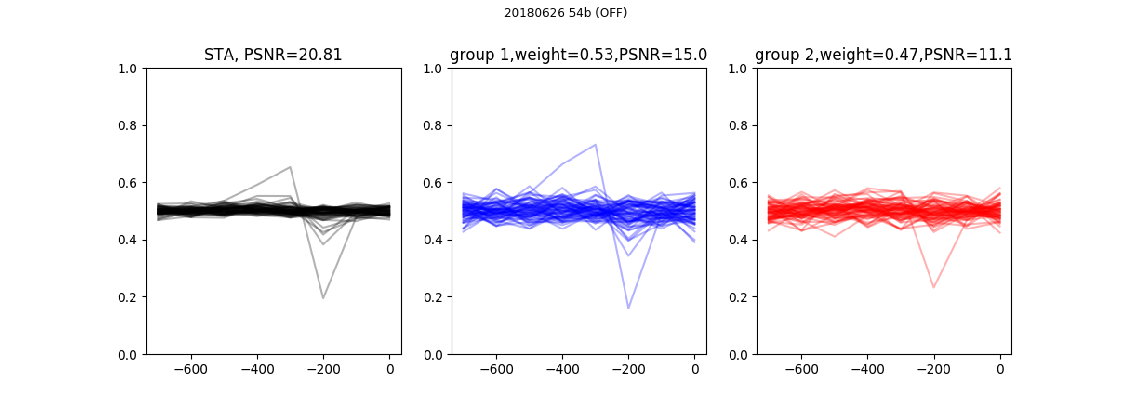

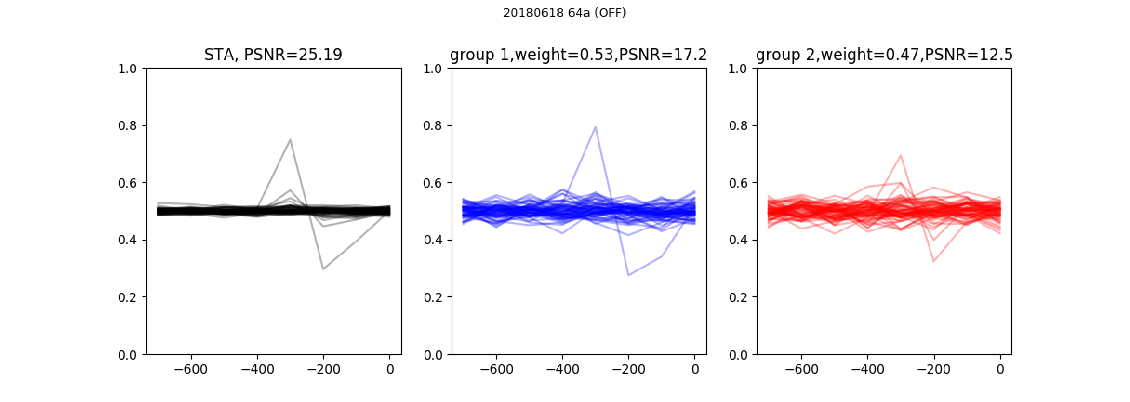

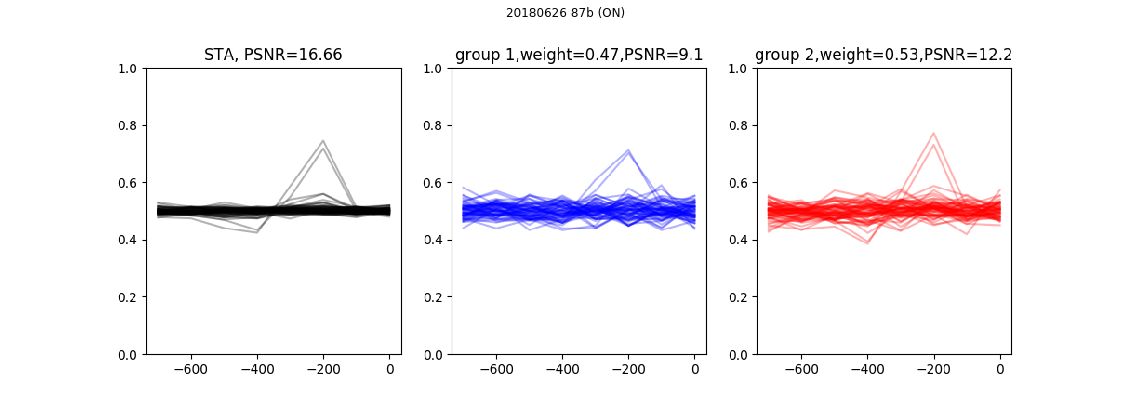

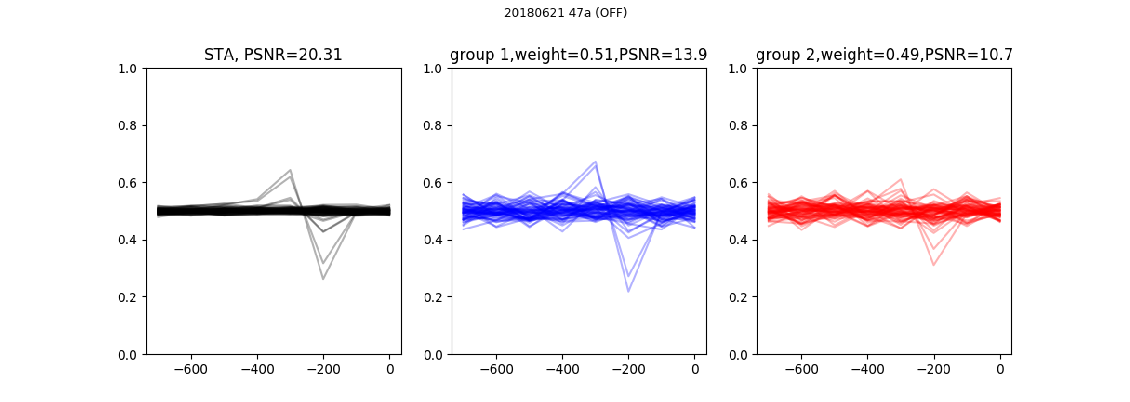

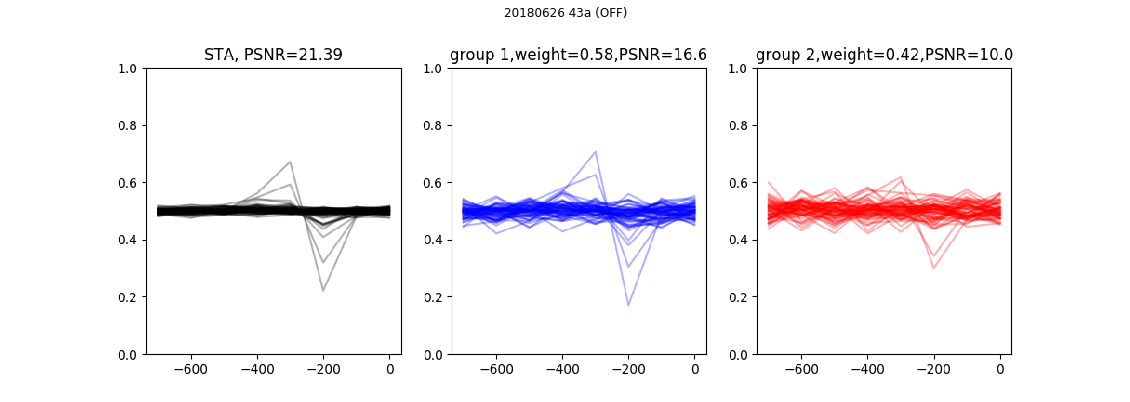

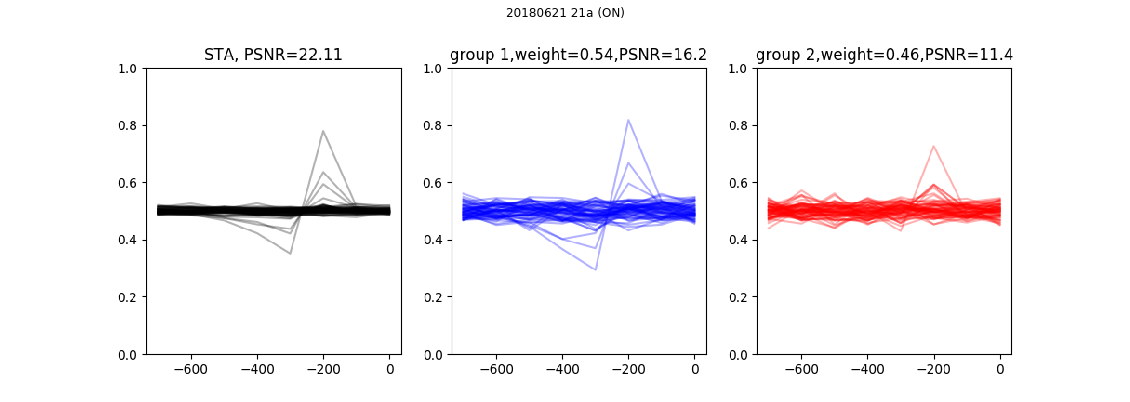

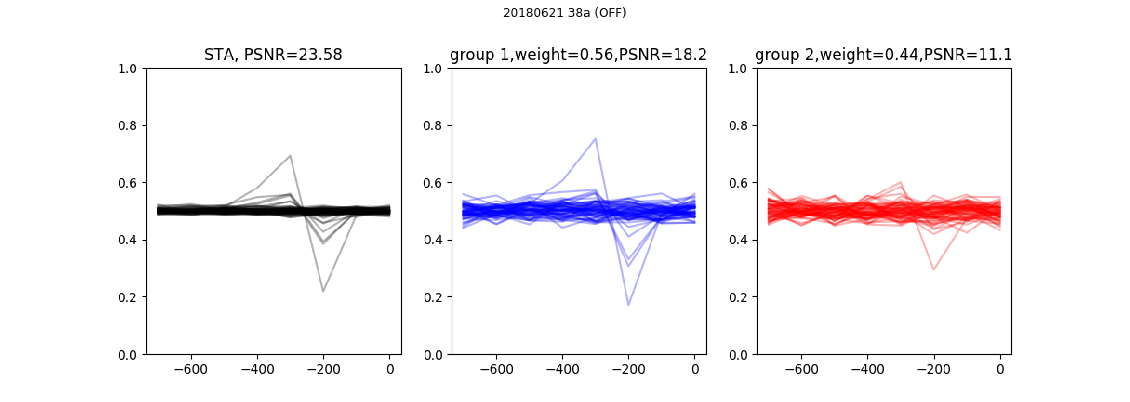

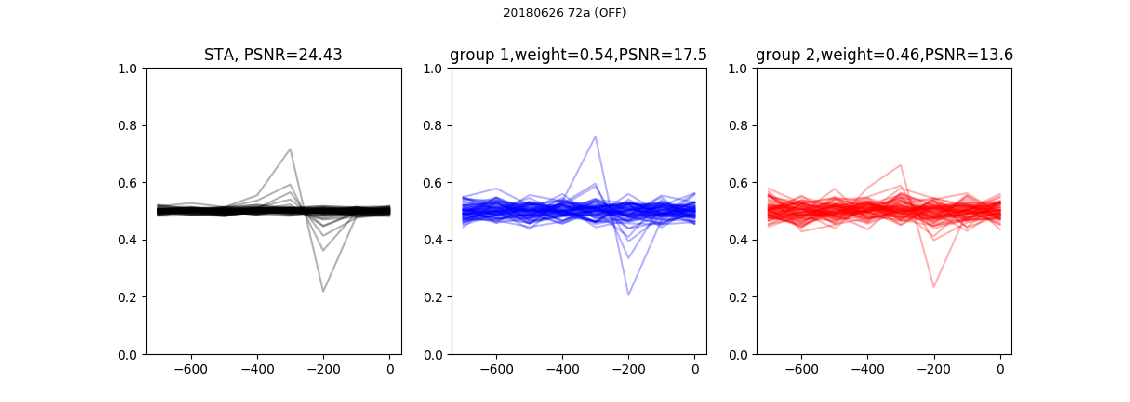

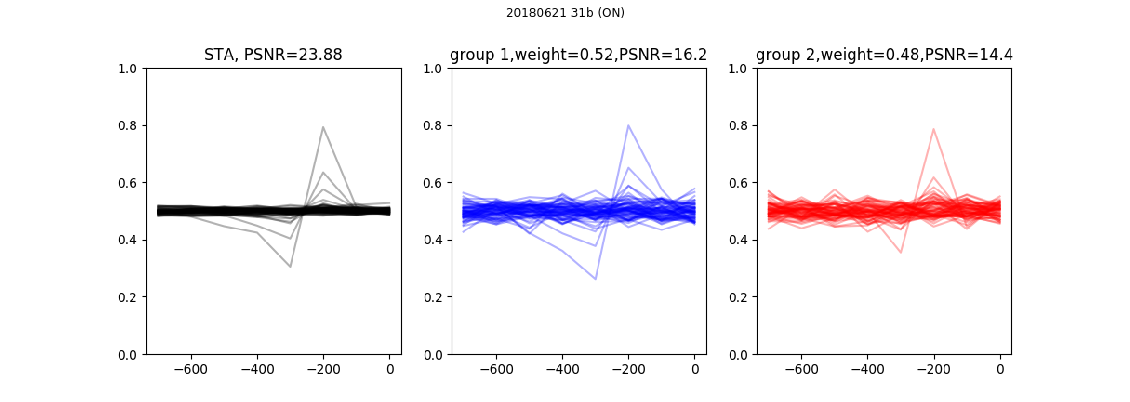

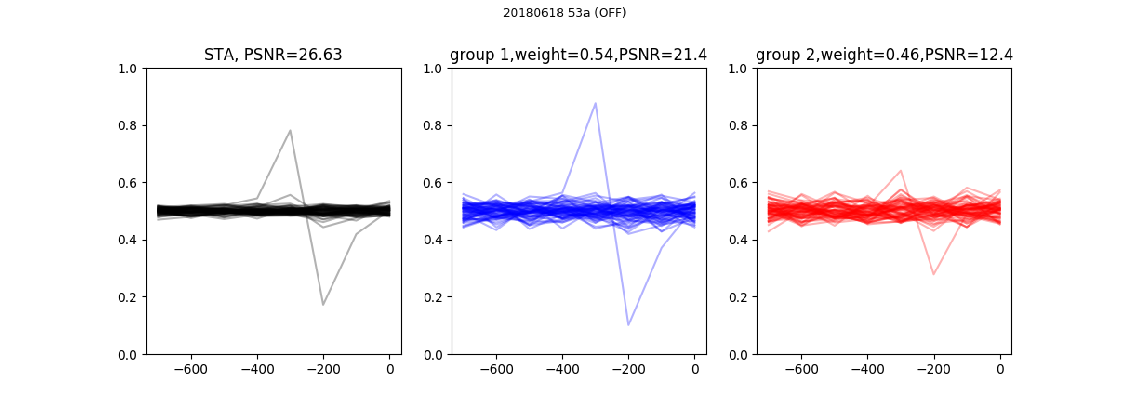

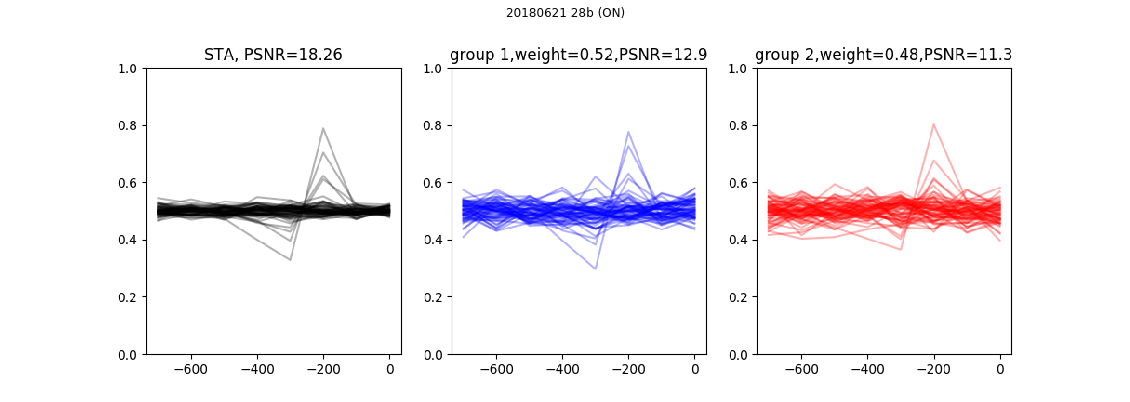

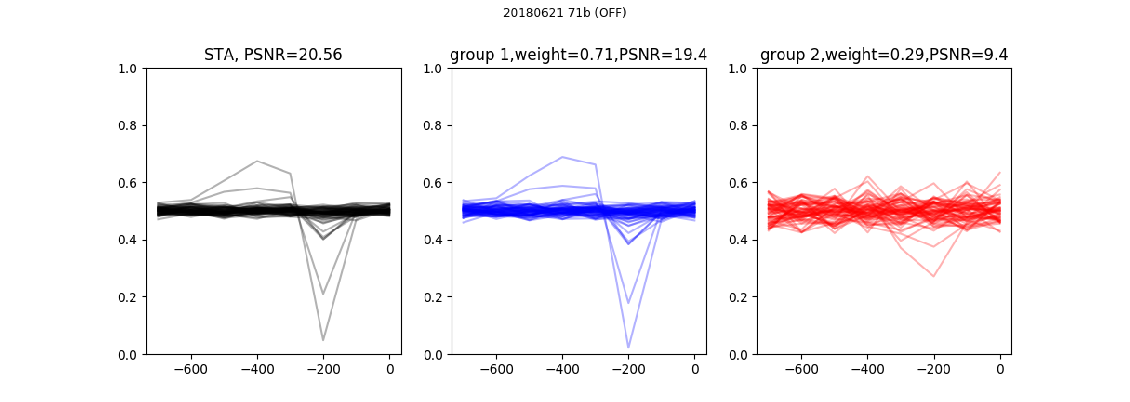

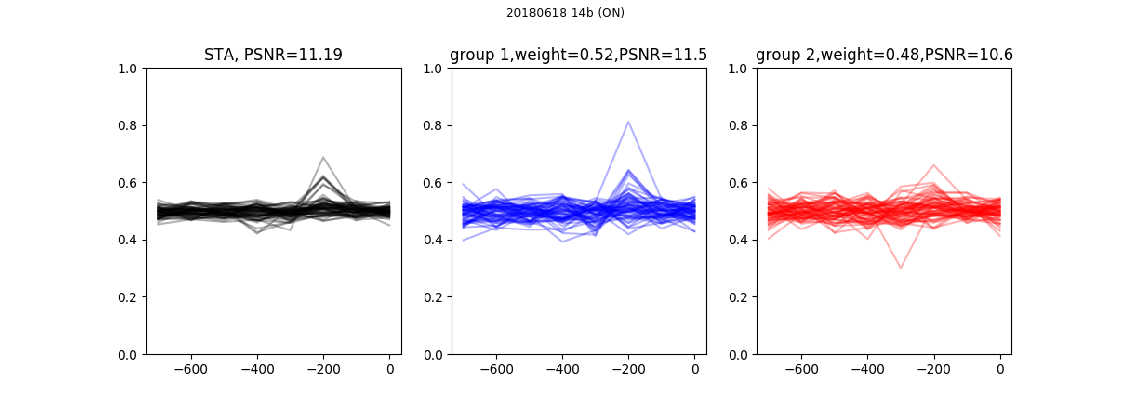

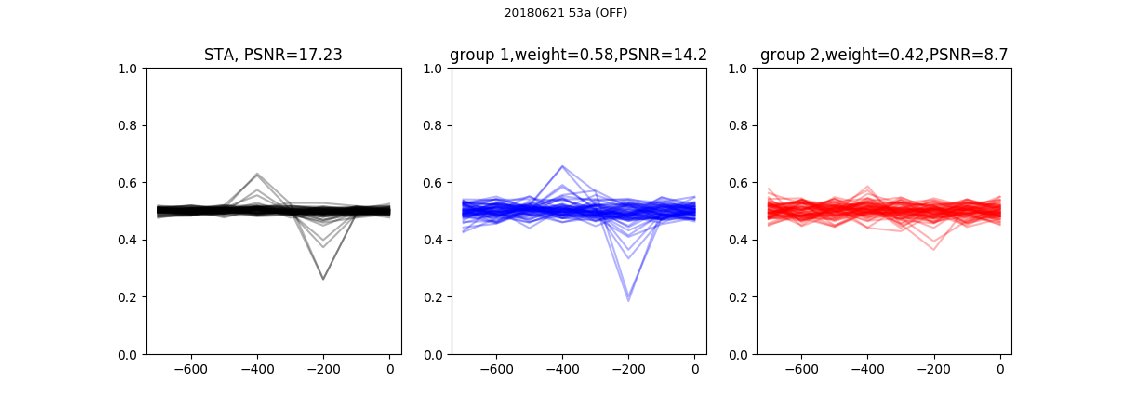

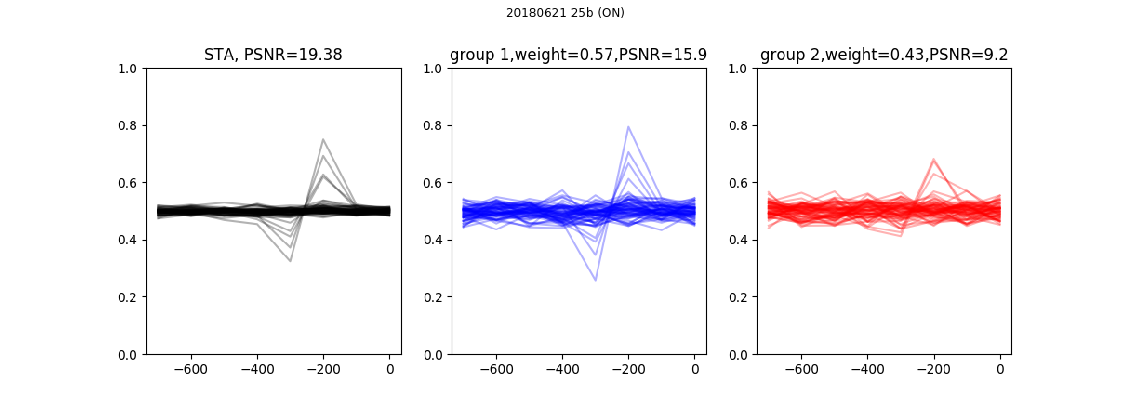

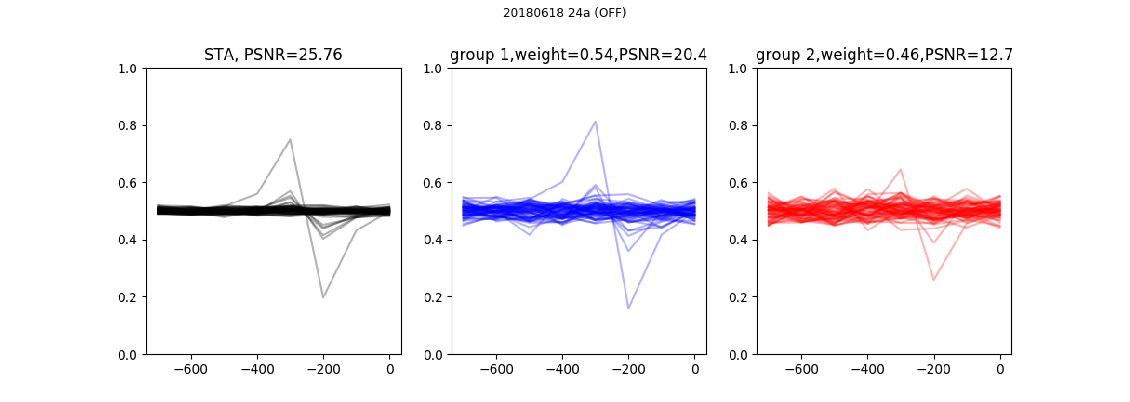

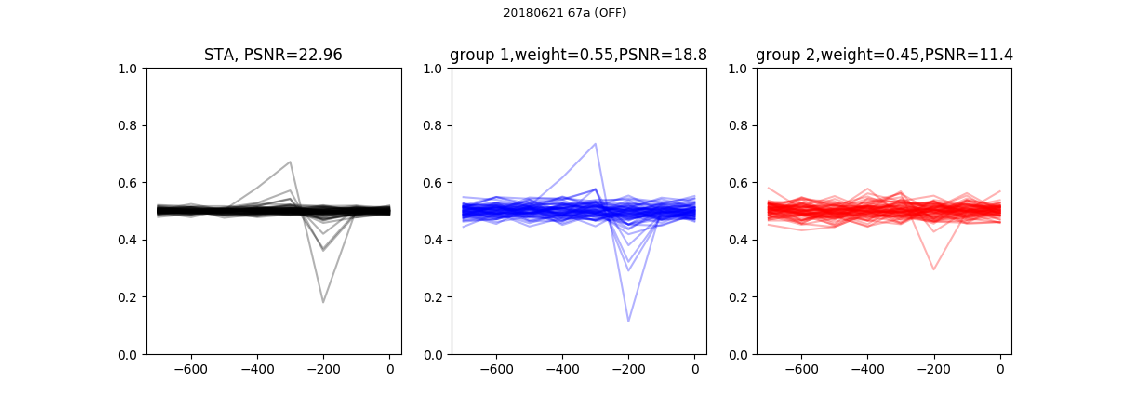

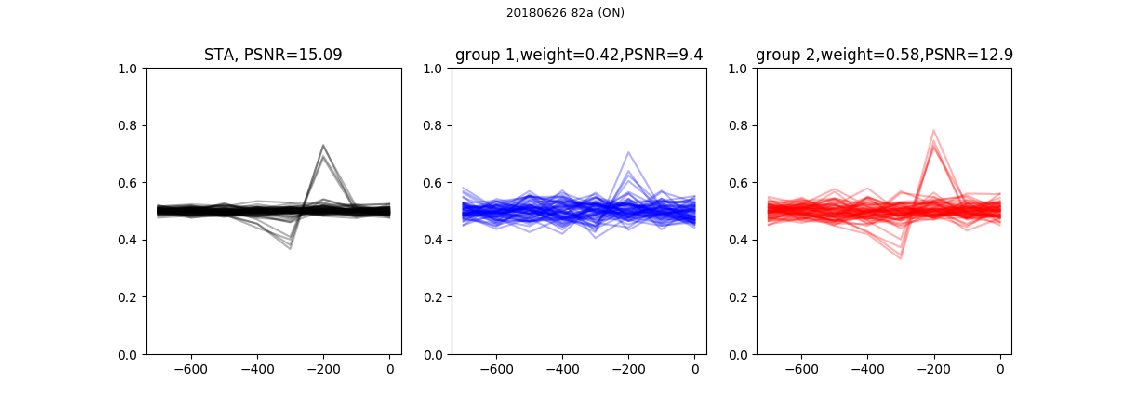

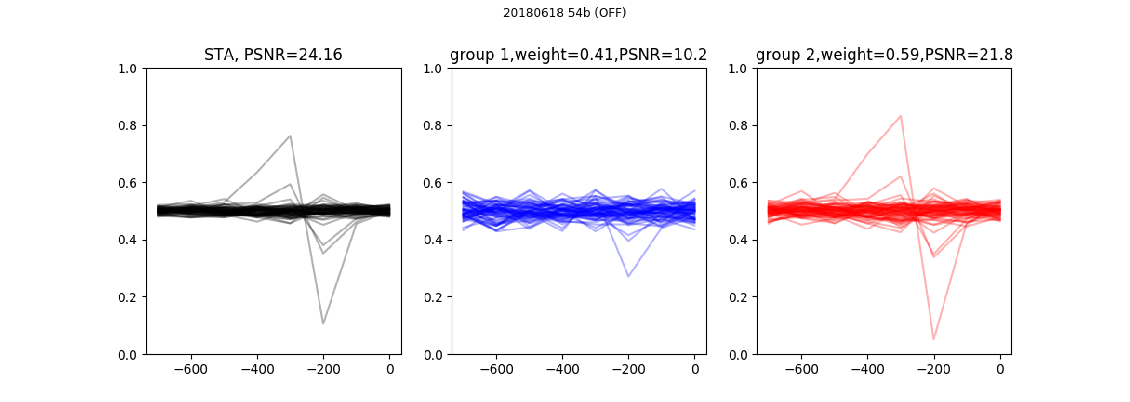

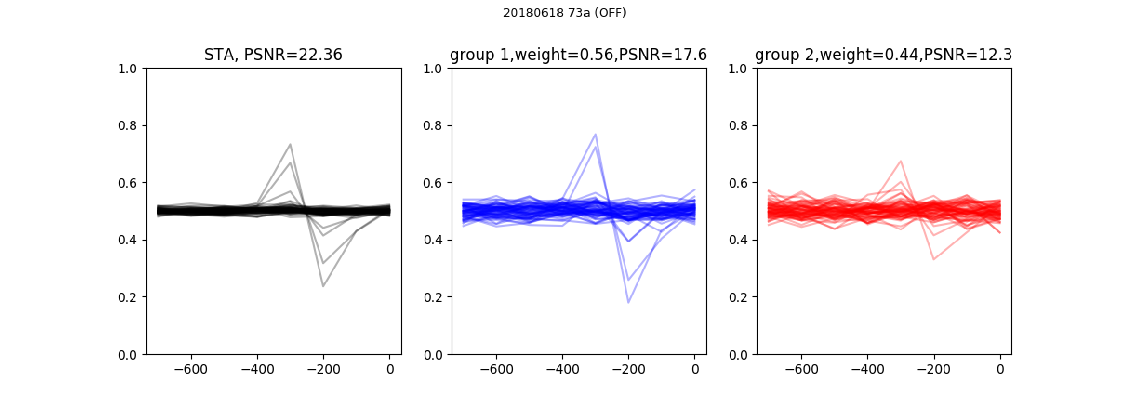

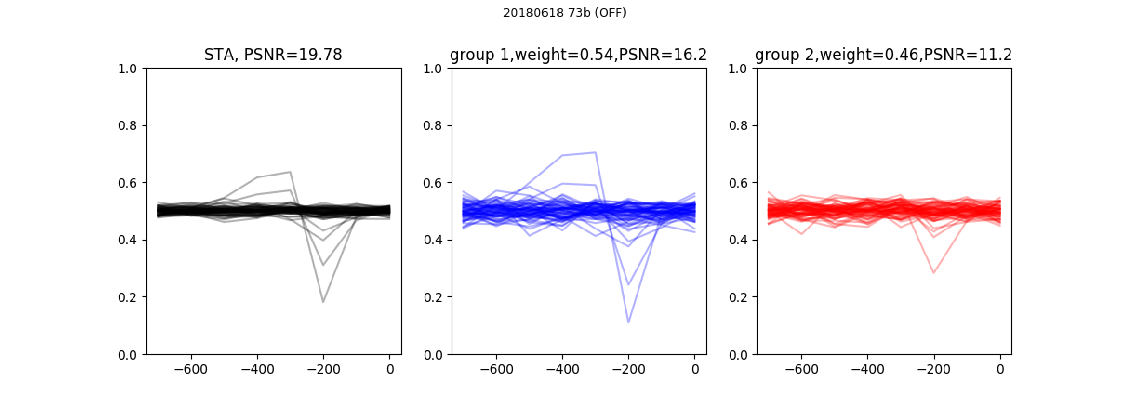

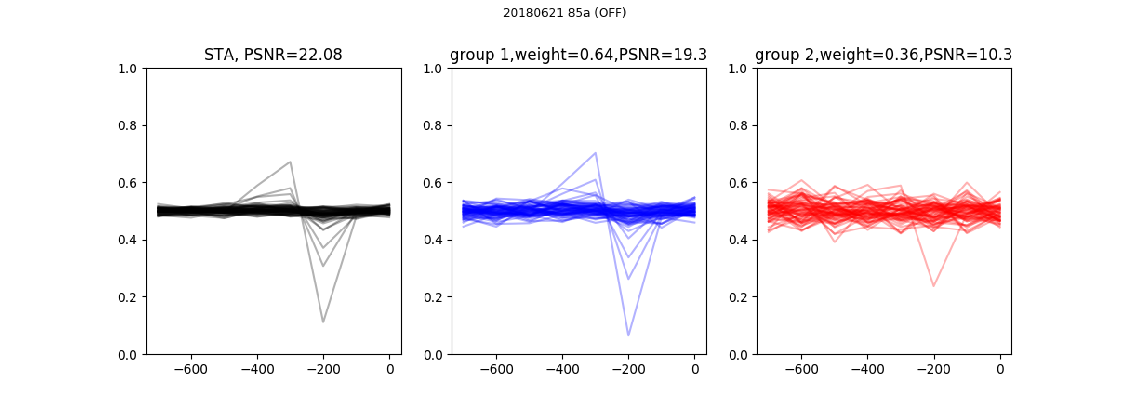

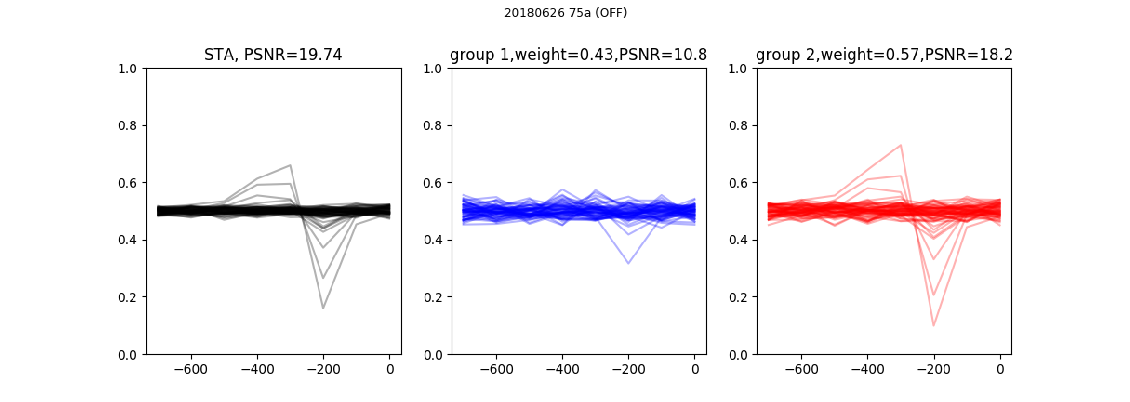

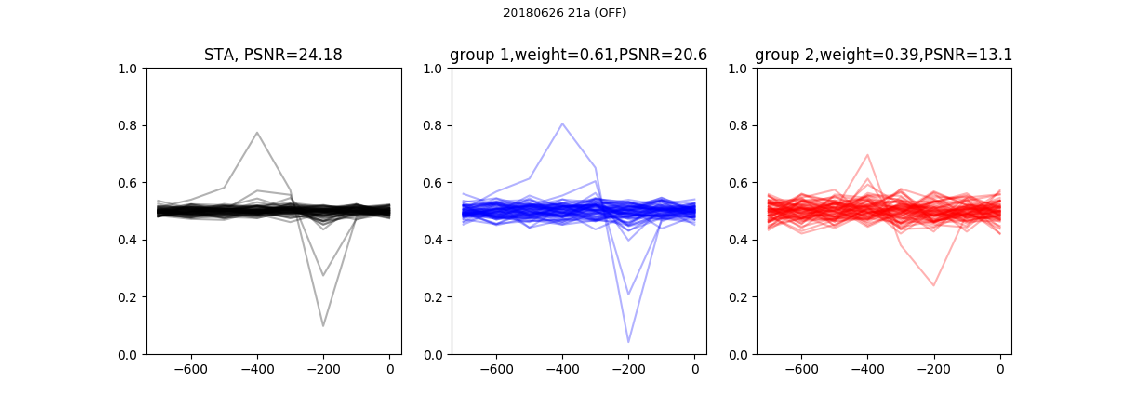

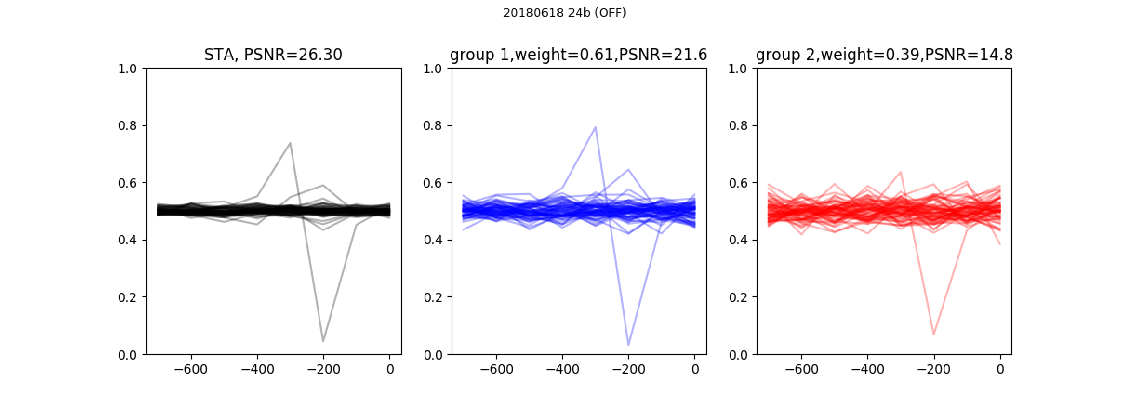

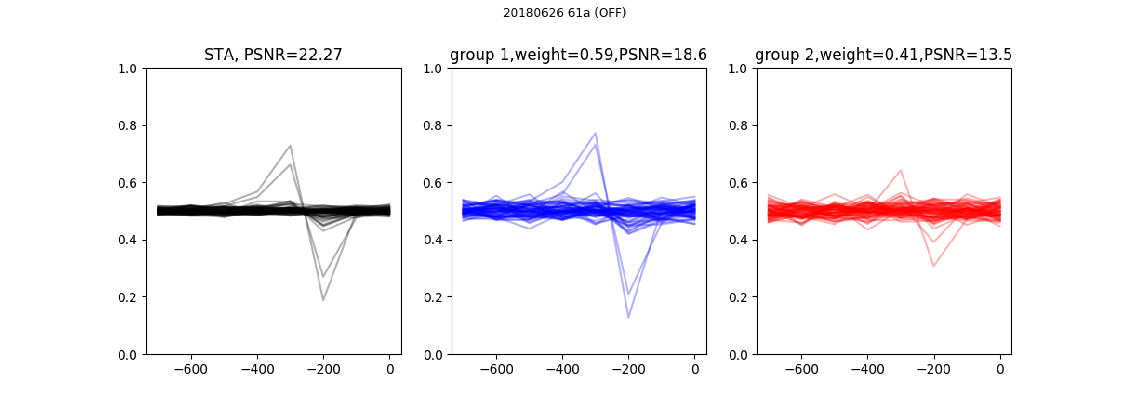

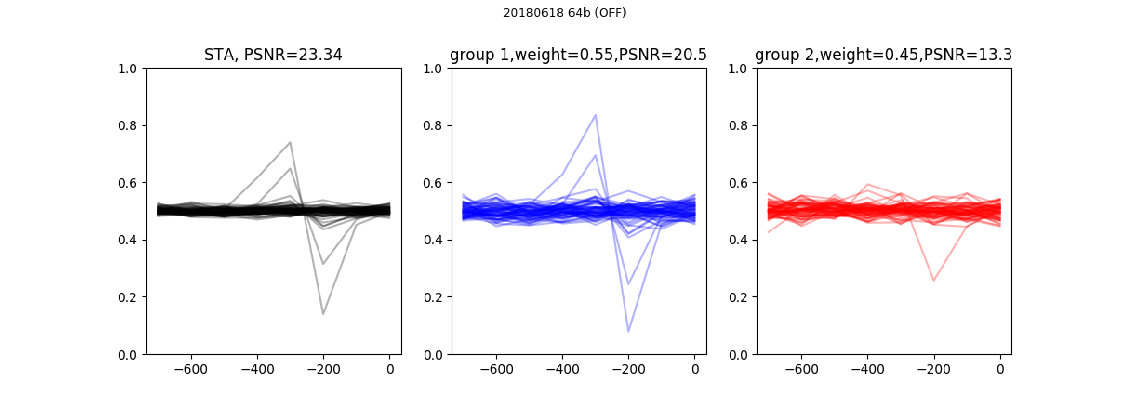

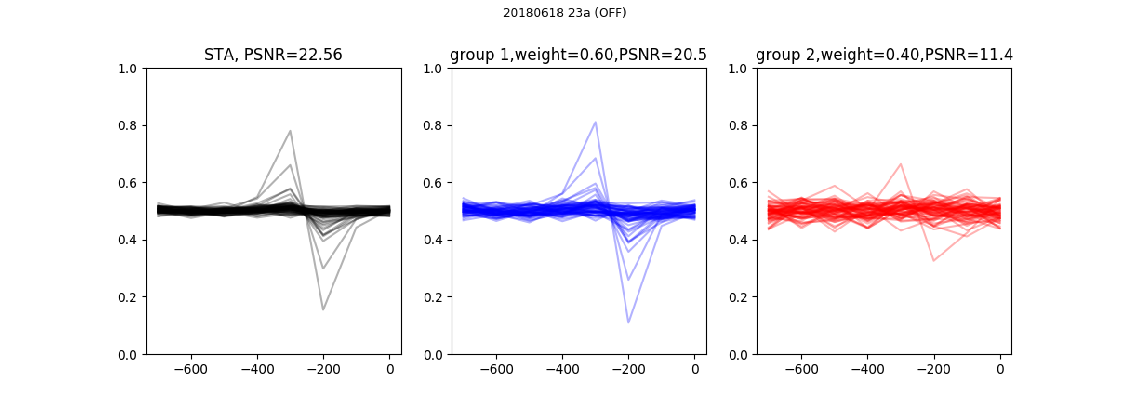

In [37]:
# sort by inner product and plot
def plot_an_example(series, cluster_dim, temporal_profile=True, spatial_profile=[], filename=None):
    dataset_name = series["dataset"]
    folder_name = "{}_tap8_cov_classic_cluster_dim{}".format(dataset_name, cluster_dim)
    channel_name = series["channel_name"]
    cell_type = series["cell_type"]
    inner_product = series["inner_product"]

    PSNR = series["PSNR"]        
    PSNR1 = series["PSNR1"]
    PSNR2 = series["PSNR2"]

#     print(i, dataset_name, channel_name, cell_type, inner_product, PSNR1, PSNR2)
    
    if temporal_profile:
        plt.figure(figsize=(20,8))
        im1 = plt.imread(os.path.join(folder_name, "{}_centers.png".format(channel_name)))
        
        plt.imshow(im1)
        plt.box('off')
        plt.axis('off')
        
        plt.title(dataset_name + " " + channel_name + " ({})".format(cell_type))
        if filename is not None:
            plt.savefig("{}_{}_{}_temporal.png".format(filename,dataset_name,channel_name))
#             print("{}_{}_{}_temporal.png".format(filename,dataset_name,channel_name))

    for group_idx in spatial_profile:
        plt.figure(figsize=(20,8))
        im1 = plt.imread(os.path.join(folder_name, "{}_center_{}.png".format(channel_name,group_idx)))
        
        plt.imshow(im1)
        plt.box('off')
        plt.axis('off')
        
        if filename is not None:
            plt.savefig("{}_{}_{}_spatial_{}.png".format(filename,dataset_name,channel_name,group_idx))
#             print("{}_{}_{}_spatial_{}.png".format(filename,dataset_name,channel_name,group_idx))

        
def plot_examples(cluster_sorted, cluster_dim, temporal_profile=True, spatial_profile=[], filename=None):            
    for i in range(len(cluster_sorted)):
        
        if filename is not None:
            filename_i = "figure/{}_dim{}_{}".format(filename, cluster_dim, i)

        plot_an_example(cluster_sorted.iloc[i], cluster_dim, temporal_profile=temporal_profile, spatial_profile=spatial_profile, filename=filename_i)

        
plot_examples(cluster_thresholded, cluster_dim, filename="combined_cluster_dim{}_spd{}_sorted_by_inner_product".format(cluster_dim,spike_per_dim))

## manually check using saved temporal profiles

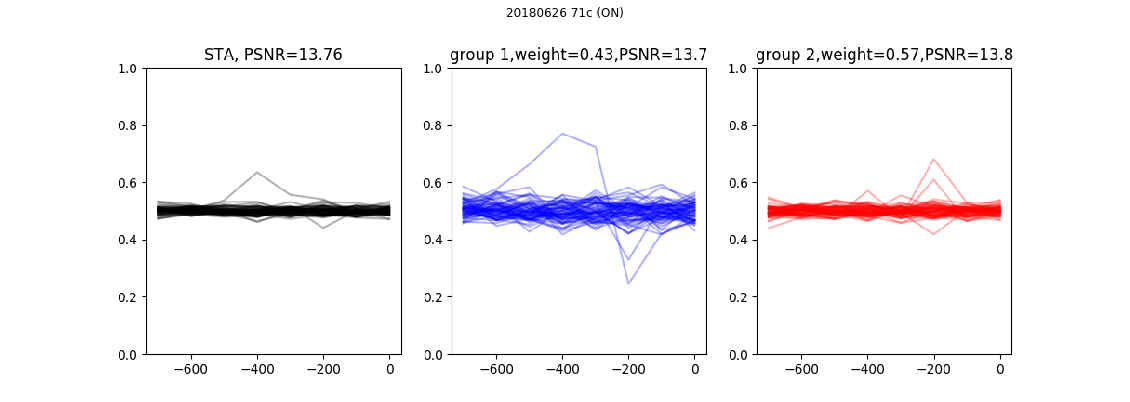

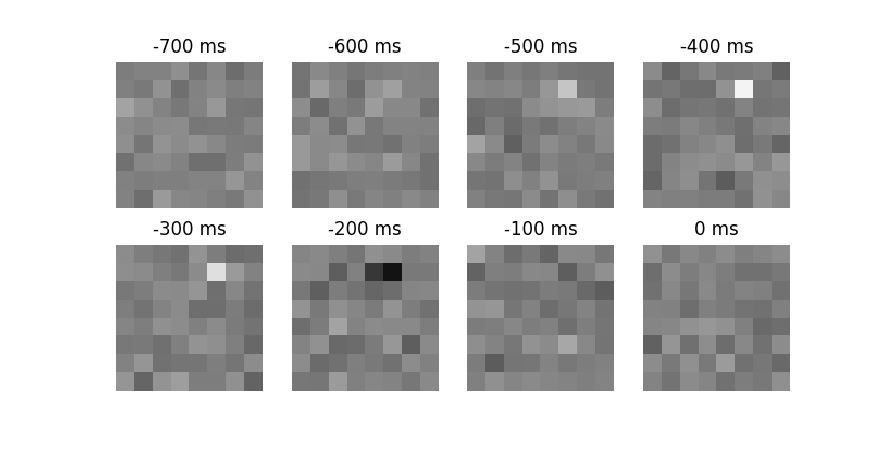

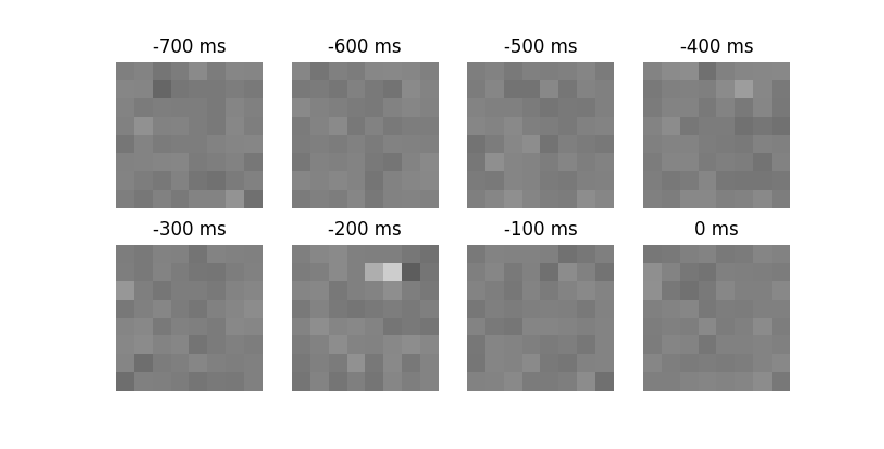

In [38]:
# double check  (dim=2, spd=4)
# plot_an_example(cluster_thresholded.iloc[16], dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[20], dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[22], dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[31], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])

# plot_an_example(cluster_thresholded.iloc[17], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[19], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[34], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[25], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[52], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # does not overlap spatially


# double check  (dim=2, spd=2)
# plot_an_example(cluster_thresholded.iloc[14], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[18], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[20], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # No
# plot_an_example(cluster_thresholded.iloc[21], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # Yes
# plot_an_example(cluster_thresholded.iloc[22], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # No
# plot_an_example(cluster_thresholded.iloc[23], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # Yes
plot_an_example(cluster_thresholded.iloc[34], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # Yes
# plot_an_example(cluster_thresholded.iloc[22], dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[31], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])




In [48]:
# manual inspection


if cluster_dim==2:
    if spike_per_dim == 4:
        idx_checked = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 31]
    elif spike_per_dim ==2:
        idx_checked = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                       10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                       21, 23, 34]
            
elif cluster_dim==3:
    idx_checked = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]
    pass
else:
    pass

cluster_checked = cluster_thresholded.iloc[idx_checked]

cluster_checked.to_csv("on_and_off_dim{}.csv".format(cluster_dim), index=None)

print(len(cluster_checked))

23


In [49]:
# plt.figure(figsize=(7,15))
# plt.subplot(311)
# plot_inner_product_vs_eig1(cluster_with_enough_spikes)
# plt.xlim([-0.6, 0])
# plt.subplot(312)
# plot_inner_product_vs_eig1(cluster_thresholded)
# plt.xlim([-0.6, 0])
# plt.subplot(313)
# plot_inner_product_vs_eig1(cluster_checked)
# plt.xlim([-0.6, 0])

In [50]:
cluster_checked["cell_type_on_and_off"]=True

cluster_checked.to_csv("cluster_dim{}_on_and_off_checked.csv".format(cluster_dim))
cluster_checked

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


channel_name  num_spikes cell_type       PSNR      eig1      eig2  \
64           36c        4098   unknown  10.318830  0.798256  0.620102   
24           22a        2860        ON  17.556724  0.838246  0.704459   
38           32b        3530        ON  16.838700  0.862429  0.749463   
44           35a        9638        ON  13.477084  0.665520  0.552200   
109          85b        4002        ON  11.494061  0.678136  0.597015   
43           34b        4208        ON  18.520772  0.706069  0.597161   
22           23b        4619        ON  11.990694  0.700543  0.608037   
25           22b        2413   unknown   6.267735  0.835159  0.782430   
67           37b        9568       OFF  18.715314  0.542621  0.476537   
86           46b        2762       OFF  10.083432  0.592556  0.580456   
57           42b        8472        ON  21.819161  0.567641  0.502737   
26           26c        6699        ON  20.090976  0.498963  0.470083   
122          71b        7557        ON  23.712959  0.575136  0.510658   
6            16a       22460   unknown   9.654894  0.448151  0.420615   
76           54d        2966        ON  19.675728  0.927184  0.759760   
71           53b        6622       OFF  19.471693  0.529478  0.499515   
77           61a        6741   unknown   7.826017  0.497795  0.488286   
12           21b       10519   unknown   9.359431  0.466609  0.459186   
33           32a       11842        ON  23.692912  0.544881  0.489408   
14           22b       15606       OFF  16.500673  0.443572  0.439005   
53           41a       16997       OFF  19.648014  0.450724  0.432585   
7            14a        5973        ON  25.775064  0.620785  0.571746   
123          71c        2912        ON  13.760327  0.630695  0.600578   

         eig3  converged      PSNR1      PSNR2   weight1   weight2  \
64   0.613533       True  18.892517  18.855896  0.524121  0.475879   
24   0.671715       True  18.716530  14.826105  0.647365  0.352635   
38   0.716215       True  17.936124  14.497231  0.647646  0.352354   
44   0.548982       True  25.869758  22.670575  0.553304  0.446696   
109  0.581718       True  15.846811  14.866739  0.515823  0.484177   
43   0.588002       True  21.493398  19.136803  0.566473  0.433527   
22   0.595794       True  17.952531  17.924992  0.526349  0.473651   
25   0.732217       True  12.865903  10.592013  0.380812  0.619188   
67   0.469468       True  20.694819  15.913280  0.518498  0.481502   
86   0.562291       True  12.540200   8.637063  0.502355  0.497645   
57   0.496190       True  22.212132  13.903167  0.540581  0.459419   
26   0.461593       True  19.790906  12.163867  0.533108  0.466892   
122  0.508055       True  25.080139  19.315994  0.541918  0.458082   
6    0.417214       True  12.633903  14.917845  0.507878  0.492122   
76   0.752497       True   9.463352  19.956145  0.283012  0.716988   
71   0.496398       True  18.447659  10.061117  0.528369  0.471631   
77   0.475730       True  12.518911  14.101404  0.467577  0.532423   
12   0.451273       True  10.360958   9.533271  0.489045  0.510955   
33   0.483369       True  21.754861   9.931059  0.523884  0.476116   
14   0.435544       True  12.984921  13.880398  0.510985  0.489015   
53   0.428108       True  21.252288  11.938636  0.533711  0.466289   
7    0.562778       True  25.702134  15.884281  0.598530  0.401470   
123  0.589766       True  13.720303  13.828661  0.432951  0.567049   

     inner_product   dataset  cell_type_on_and_off  
64       -0.555696  20180626                  True  
24       -0.479533  20180626                  True  
38       -0.449921  20180618                  True  
44       -0.437553  20180618                  True  
109      -0.394200  20180621                  True  
43       -0.375909  20180618                  True  
22       -0.357312  20180618                  True  
25       -0.312358  20180626                  True  
67       -0.303349  20180626                  True  
86       -0.284796  20180626            

In [60]:
## check statistics
cluster_combined = cluster_with_enough_spikes
# cluster_combined["cell_type_clustered"]=cluster_combined["cell_type"]
cluster_combined = cluster_combined.merge(cluster_checked[["dataset", "channel_name","cell_type_on_and_off"]], on=["dataset", "channel_name"], how="outer")

# fill NaN with original cell_type
idx_null = cluster_combined["cell_type_on_and_off"].isnull()
cluster_combined.loc[idx_null, "cell_type_on_and_off"] = False

# combine original cell_type
cluster_combined["cell_type_combined"] = cluster_combined["cell_type"]
cluster_combined.loc[~idx_null,"cell_type_combined"] = "ON/OFF"

cluster_combined


channel_name  num_spikes cell_type       PSNR      eig1      eig2  \
0            12a        1978       OFF  12.186541  0.971392  0.754007   
1            12b        1228        ON   9.526389  0.920008  0.895442   
2            14a        5973        ON  25.775064  0.620785  0.571746   
3            14b        1212        ON  11.186482  0.795804  0.766490   
4            17a        5929   unknown   8.452868  0.436700  0.434049   
..           ...         ...       ...        ...       ...       ...   
213          83b        1300       OFF  14.727492  0.879242  0.851718   
214          86a        3186        ON  19.576154  0.952703  0.766365   
215          86b        1684   unknown   6.779709  0.788005  0.759195   
216          87a        9120       OFF  21.676952  0.590420  0.517161   
217          87b        3797        ON  16.662341  0.487358  0.482080   

         eig3  converged      PSNR1      PSNR2   weight1   weight2  \
0    0.737358       True  11.450823  10.235904  0.636834  0.363166   
1    0.871839       True   9.419680   7.839765  0.662558  0.337442   
2    0.562778       True  25.702134  15.884281  0.598530  0.401470   
3    0.746218       True  11.501885  10.593278  0.516448  0.483552   
4    0.430598       True   6.269053   5.988208  0.504045  0.495955   
..        ...        ...        ...        ...       ...       ...   
213  0.813824       True  14.368050  10.560972  0.570767  0.429233   
214  0.749286       True   9.892318  19.695189  0.276750  0.723250   
215  0.735989       True   6.928302   6.117002  0.336812  0.663188   
216  0.512286       True  19.043271  14.230278  0.600327  0.399673   
217  0.475510       True   9.090881  12.160747  0.469121  0.530879   

     inner_product   dataset cell_type_on_and_off cell_type_combined  
0         0.420599  20180618                False                OFF  
1         0.255689  20180618                False                 ON  
2        -0.206751  20180618                 True             ON/OFF  
3        -0.076766  20180618                False                 ON  
4        -0.251180  20180618                False            unknown  
..             ...       ...                  ...                ...  
213       0.310200  20180626                False                OFF  
214       0.588351  20180626                False                 ON  
215      -0.003025  20180626                False            unknown  
216       0.056832  20180626                False                OFF  
217      -0.128974  20180626                False                 ON  

[218 rows x 16 columns]

In [61]:
print(cluster_combined["cell_type_combined"].value_counts())
print(cluster_combined["cell_type_combined"].value_counts() / len(cluster_combined))

OFF        102
ON          50
unknown     43
ON/OFF      23
Name: cell_type_combined, dtype: int64
OFF        0.467890
ON         0.229358
unknown    0.197248
ON/OFF     0.105505
Name: cell_type_combined, dtype: float64


(0.3, 1)

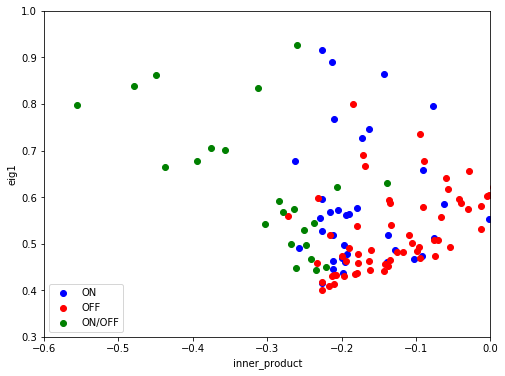

In [68]:
# plot inner_product vs. eig1

plt.figure(figsize=(8,6))
pysta.plot_scatter_by_group(cluster_combined, ["inner_product", "eig1"],
                            "cell_type_combined", ["ON", "OFF", "ON/OFF"], ["b","r","g"], alpha=1)                            
#                             "cell_type_combined", ["ON", "OFF", "ON/OFF","unknown"], ["b","r","g","k"])

plt.xlim(-0.6, 0)
plt.ylim(0.3, 1)

-0.5464357671953347

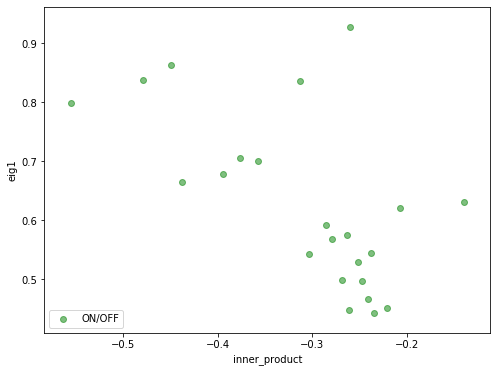

In [70]:
plt.figure(figsize=(8,6))
pysta.plot_scatter_by_group(cluster_combined, ["inner_product", "eig1"], 
                            "cell_type_combined", ["ON/OFF"], ['g'])

idx = cluster_combined["cell_type_combined"] == "ON/OFF"
np.corrcoef(cluster_checked.loc[idx,"inner_product"],cluster_checked.loc[idx,"eig1"])[0,1]

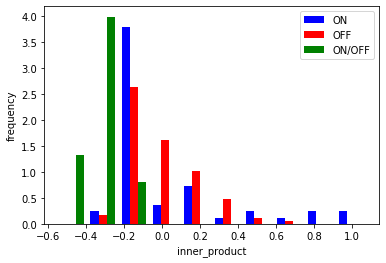

In [71]:
pysta.plot_hist_by_group(cluster_combined, "inner_product", 
                         "cell_type_combined", ["ON", "OFF", "ON/OFF"], ["b",'r','g'],
                         density=True)

In [ ]:
cluster.groupby("cell_type").mean()

In [ ]:
cluster_combined.groupby("cell_type_clustered").mean()

In [ ]:
cluster_combined.groupby("cell_type_clustered").median()

In [ ]:
cluster_combined["on_and_off"].value_counts()

In [ ]:
# combine cell type info
cluster_combined["cell_type_clustered"] = cluster_combined["cell_type"]

idx_on_and_off = cluster_combined["on_and_off"]
cluster_combined.loc[idx_on_and_off,"cell_type_clustered"] = "ON/OFF"


In [ ]:
# save to .csv
cluster_combined.to_csv("cluster_combined_dim{}_spd{}.csv".format(cluster_dim,spike_per_dim), index=None)

In [ ]:
# plt.figure()
plt.figure(figsize=(15,12))
plt.subplot(221)
pysta.plot_hist_by_group(cluster_combined, "num_spikes", "on_and_off", [True, False], color=["g", 'k'], bins=bins_for_num_spikes)
# plt.figure()
plt.subplot(222)
pysta.plot_hist_by_group(cluster_combined, "PSNR", "on_and_off", [True, False], color=["g", 'k'])
# plt.figure()
plt.subplot(223)
pysta.plot_hist_by_group(cluster_combined, "PSNR1", "on_and_off", [True, False], color=["g", 'k'])
# plt.figure()
plt.subplot(224)
pysta.plot_hist_by_group(cluster_combined, "PSNR2", "on_and_off", [True, False], color=["g", 'k'])

In [ ]:
plt.figure(figsize=(15,12))
plt.subplot(221)
pysta.plot_hist_by_group(cluster_combined, "num_spikes", "cell_type_clustered",["ON", "OFF", "ON/OFF", "unknown"], color=["b","r","g", 'k'], bins=bins_for_num_spikes)

plt.subplot(222)
pysta.plot_hist_by_group(cluster_combined, "PSNR", "cell_type_clustered", ["ON", "OFF", "ON/OFF", "unknown"], color=["b","r","g", 'k'])

plt.subplot(223)
pysta.plot_hist_by_group(cluster_combined, "eig1", "cell_type_clustered", ["ON", "OFF", "ON/OFF", "unknown"], color=["b","r","g", 'k'])

plt.subplot(224)
pysta.plot_hist_by_group(cluster_combined, "inner_product", "cell_type_clustered", ["ON", "OFF", "ON/OFF", "unknown"], color=["b","r","g", 'k'])

plt.savefig("figure/cluster_result_dim{}_spd{}.png".format(cluster_dim,spike_per_dim))
plt.savefig("figure/cluster_result_dim{}_spd{}.pdf".format(cluster_dim,spike_per_dim))
# cluster_combined.hist("PSNR", by="cell_type_clustered", sharex=True)
# cluster_combined.hist("PSNR1", by="cell_type_clustered", sharex=True)
# cluster_combined.hist("PSNR2", by="cell_type_clustered", sharex=True)


In [ ]:
# original cell type vs. clustered
# col = "PSNR"
col = "num_spikes"
plt.figure()
bins_for_num_spikes=np.linspace(0,15000,15)
pysta.plot_hist_by_cell_type(cluster_combined, col, bins=bins_for_num_spikes)
plt.figure()
pysta.plot_hist_by_group(cluster_combined, col, "cell_type_clustered", ["ON","OFF","ON/OFF","unknown"], color=["r", "b", "g", "k"],bins=bins_for_num_spikes)

In [ ]:
# original cell type vs. clustered
plt.figure()
pysta.plot_hist_by_group(cluster_combined, "eig1", "cell_type", ["ON","OFF","unknown"], color=["r", "b", "k"])
plt.figure()
pysta.plot_hist_by_group(cluster_combined, "eig1", "cell_type_clustered", ["ON","OFF","ON/OFF","unknown"], color=["r", "b", "g", "k"])

In [ ]:
# original cell type vs. clustered
plt.figure()
pysta.plot_hist_by_group(cluster_combined, "inner_product", "cell_type", ["ON","OFF","unknown"], color=["r", "b", "k"])
plt.figure()
pysta.plot_hist_by_group(cluster_combined, "inner_product", "cell_type_clustered", ["ON","OFF","ON/OFF","unknown"], color=["r", "b", "g", "k"])

In [ ]:
plot_examples(cluster_checked, cluster_dim, temporal_profile=True, spatial_profile=[1, 2], filename="combined_cluster_dim{}_spd{}_checked".format(cluster_dim,spike_per_dim))

In [ ]:
# plt.hist(PSNR1_selected)
# plt.show()
# plt.hist(PSNR2_selected)
# plt.show()
# plt.scatter(PSNR1_selected,PSNR2_selected)
# plt.plot([5,25],[5,25], 'k--')
# plt.xlabel('PSNR1')
# plt.ylabel('PSNR2')
# plt.show()
# plt.scatter(PSNR_selected,PSNR1_selected)
# plt.scatter(PSNR_selected,PSNR2_selected)
# plt.plot([5,25],[5,25], 'k--')
# plt.xlabel('PSNR')
# plt.legend(['','PSNR1', 'PSNR2'])
# plt.show()

In [ ]:

plt.hist(cluster_checked["cell_type"])

print(len(cluster_checked))
cluster_checked["cell_type"].value_counts()

In [ ]:
# # sort by inner product and plot

# cluster_sorted_by_eig1 = cluster_with_enough_samples.sort_values('eig1').head(30)#.sort_values("dataset")

# plot_examples(cluster_sorted_by_eig1, "cluster_eig", dim=dim)




In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
pysta.plot_scatter_by_cell_type(cluster_checked,["PSNR","PSNR1"])
plt.plot([7.5,25], [7.5,25], 'k--')
plt.subplot(122)
pysta.plot_scatter_by_cell_type(cluster_checked,["PSNR","PSNR2"])
plt.plot([7.5,25], [7.5,25], 'k--')

In [ ]:
plot_scatter(cluster_checked)

## compare results with d=2 and d=3

In [ ]:
on_and_off_dim2 = pd.read_csv("on_and_off_dim2.csv")
on_and_off_dim3 = pd.read_csv("on_and_off_dim3.csv")



channel_on_and_off_dim2 = set(on_and_off_dim2["channel_name"])
channel_on_and_off_dim3 = set(on_and_off_dim3["channel_name"])
channel_on_and_off_union = channel_on_and_off_dim2.union(channel_on_and_off_dim3)
channel_on_and_off_intersection = channel_on_and_off_dim2.intersection(channel_on_and_off_dim3)

print(len(channel_on_and_off_dim2))
print(len(channel_on_and_off_dim3))
print(len(channel_on_and_off_union))
print(len(channel_on_and_off_intersection))

print("union:", channel_on_and_off_union)
print("intersect:", channel_on_and_off_intersection)
print("dim=2 only:", channel_on_and_off_dim2 - channel_on_and_off_dim3)
print("dim=3 only:", channel_on_and_off_dim3 - channel_on_and_off_dim2)

In [ ]:
# compare results
d2 = np.load("data/clustered_dim2.npz", allow_pickle=True)
d2_channel_names = [info["channel_name"] for info in d2["info"]]

d3 = np.load("data/clustered_dim3.npz", allow_pickle=True)
d3_channel_names = [info["channel_name"] for info in d3["info"]]    

def find_channel_index(channel_names, channel_name):
    for i, ch in enumerate(channel_names):
        if ch == channel_name:
            return i
    return None # not found

for channel_name in channel_on_and_off_union:
    print(channel_name)
        
    idx2 = find_channel_index(d2_channel_names, channel_name)
    idx3 = find_channel_index(d3_channel_names, channel_name)    
#     print(idx2, idx3)

    is_on_and_off_dim2 = channel_name in channel_on_and_off_dim2    
    is_on_and_off_dim3 = channel_name in channel_on_and_off_dim3
    print(is_on_and_off_dim2, is_on_and_off_dim3)
    
    sta = d2['X_train'][idx2]
    group_center1 = d2['X_test'][idx2*2]
    group_center2 = d2['X_test'][idx2*2+1]    

    tap = 8
    dt = 100
    grid_T = np.linspace(-tap + 1, 0, tap) * dt
    stcl.plot_centers(sta, [group_center1, group_center2], grid_T)
    
    sta = d3['X_train'][idx3]
    group_center1 = d3['X_test'][idx3*2]
    group_center2 = d3['X_test'][idx3*2+1]    
    stcl.plot_centers(sta, [group_center1, group_center2], grid_T)
    

In [ ]:
 d2['X_test'].shape

In [ ]:
d2["X_train"].shape

In [ ]:
d3_channel_names

In [ ]:
for k in d2.keys():
    print(k)